<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic2/Chollet_HFST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

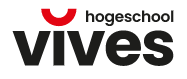<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# **2. The mathematical building blocks of neural networks**

Deze notebook is gebaseerd op hoofdstuk 2 van het boek "Deep Learning with Python" (2e editie) van François Chollet.

Dit hoofdstuk bespreekt:

*   een eerste voorbeeld van een neuraal netwerk
*   tensors en tensor operaties
*   hoe neurale netwerken leren via backpropagation en gradient descent



## 2.1. A first look at a neural network

Als eerste voorbeeld nemen we de "Hello World" van deep learning: de handgeschreven cijfers van de MNIST dataset classificeren.

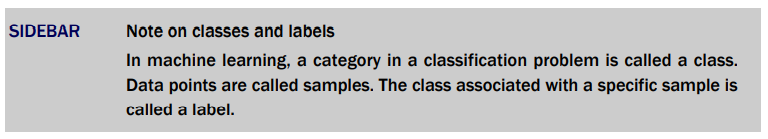

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


De MNIST dataset bestaat uit 60000 training images van 28 op 28 pixels en 10000 test images:

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


De images zijn opgeslagen als NumPy arrays:

In [ ]:
print(type(train_images))
print(type(test_images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


De labels zijn integers van 0 t.e.m. 9:

In [ ]:
import numpy as np

print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


De labels komen overeen met de handgeschreven cijfers in de images:

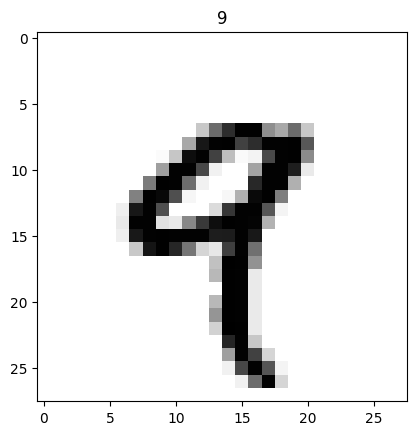

In [ ]:
import matplotlib.pyplot as plt

i = 4
digit = train_images[i]  # we nemen de 5e image uit de trainingset
plt.imshow(digit, cmap=plt.cm.binary);
plt.title(train_labels[i]);  # 5e label als titel toevoegen

De NumPy arrays bevatten waarden tussen 0 en 255 (datatype `uint8`) en moeten dus eerst omgezet worden naar waarden tussen 0 en 1 (datatype `float32`). De images moeten ook omgezet worden naar een vector, één rij van pixels ipv een matrix van pixels.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We definiëren nu een neuraal netwerk adhv de klasse ``Sequential`` dat uit twee ``Dense`` layers bestaat.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

Daarna moeten we het model compileren waarbij we een optimizer opgeven, een loss functie en een evaluatiemetriek.

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
  )

Het model trainen doen we eenvoudigweg door de ``fit`` methode aan te roepen. We definiëren 5 epochs en nemen een batch size van 128.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2603 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1081 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0710 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0517 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0394 - accuracy: 0.9877


Tijdens het trainen zien we de loss en de accuracy na elke epoch. De accuracy is op het einde al zeer hoog (> 98%). Laten we daarom het model eens evalueren met de testset.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0656 - accuracy: 0.9787
test_acc: 0.979


De nauwkeurigheid van het model is voor de testset kleiner dan die voor de trainingset, dus mogelijks hebben we hier te maken met **overfitting**.

Voorspellingen maken doen we met de methode ``predict``. Let op! Deze methode retourneert kansen, en dat is dus anders dan in Scikit-Learn!

In [ ]:
test_digits = test_images[0:10]  # de eerste 10 images
predictions = model.predict(test_digits)
predictions[0]  # de probabiliteiten van de eerste test image

1/1 [==============================] - 0s 155ms/step


array([4.6504317e-07, 2.1568175e-08, 1.6943941e-05, 2.6954673e-04,
       6.7063223e-11, 3.9112339e-07, 1.6370695e-11, 9.9970174e-01,
       2.3100361e-06, 8.6990740e-06], dtype=float32)

De softmax functie geeft in dit geval 10 kansen, dus voor elke klasse een kans. De som van alle kansen is 1; de klasse met de grootste kans geeft het voorspelde cijfer.

In [ ]:
print("sum of probabilities:", predictions[0].sum())
print("predicted:", predictions[0].argmax())
print("probability:",  predictions[0][predictions[0].argmax()])
print("true:", test_labels[0])

sum of probabilities: 1.0000001
predicted: 7
probability: 0.99970174
true: 7


Laten we nu eens de 10 test images checken:

In [ ]:
for i, prediction in enumerate(predictions):
    print(f"image {i+1}: predicted digit is {prediction.argmax()}, true digit is {test_labels[i]}")

image 1: predicted digit is 7, true digit is 7
image 2: predicted digit is 2, true digit is 2
image 3: predicted digit is 1, true digit is 1
image 4: predicted digit is 0, true digit is 0
image 5: predicted digit is 4, true digit is 4
image 6: predicted digit is 1, true digit is 1
image 7: predicted digit is 4, true digit is 4
image 8: predicted digit is 9, true digit is 9
image 9: predicted digit is 5, true digit is 5
image 10: predicted digit is 9, true digit is 9


**OPDRACHT**

We hebben al aangegeven dat we misschien met overfitting te maken hebben. Volgens de regels van de kunst moeten we daarom valideren tijdens het trainen van een neuraal netwerk. Je kan dat hier eenvoudig doen door een deel van de trainingset te reserveren voor de validatie. Dat deel noemen we de **validatieset** en je kan dat deel aangeven met een percentage. Dat doe je door een getal tussen 0 en 1 mee te geven aan de optionele inputparameter `validation_split` van methode `fit`.

Neem bijvoorbeeld 10% - dat is dus 0.1 - van de trainingset om te valideren. Hertrain het model maar neem nu meer epochs, bijv. 10 ipv 5. Zo weet je zeker dat je het model zal overfitten. Plot de loss uit voor zowel training- als validatieset en check vanaf welke epoch je overfitting krijgt. De loss wordt bijgehouden in attribuut `history` van het object dat de `fit` methode retourneert.

Let op! Je moet een nieuw model builden en compileren. Doe je dat niet en roep je de `fit` methode aan van het `model` dat je daarnet hebt getraind, dan wordt er gewoon verder getraind met de geoptimaliseerde gewichten.

*Oplossing*

In [ ]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
  )

In [ ]:
result = model.fit(train_images, train_labels,
                   epochs=10, batch_size=128,
                   validation_split=0.1);  # 10% van trainingset gebruiken voor validatie

Epoch 1/10
422/422 [==============================] - 9s 19ms/step - loss: 0.2773 - accuracy: 0.9207 - val_loss: 0.1179 - val_accuracy: 0.9655
Epoch 2/10
422/422 [==============================] - 10s 24ms/step - loss: 0.1156 - accuracy: 0.9661 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 3/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0759 - accuracy: 0.9777 - val_loss: 0.0703 - val_accuracy: 0.9780
Epoch 4/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.0699 - val_accuracy: 0.9795
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0416 - accuracy: 0.9878 - val_loss: 0.0665 - val_accuracy: 0.9793
Epoch 6/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0683 - val_accuracy: 0.9815
Epoch 7/10
422/422 [==============================] - 7s 17ms/step - loss: 0.0238 - accuracy: 0.9935 - val_loss: 0.0676 - val_accuracy: 0.982

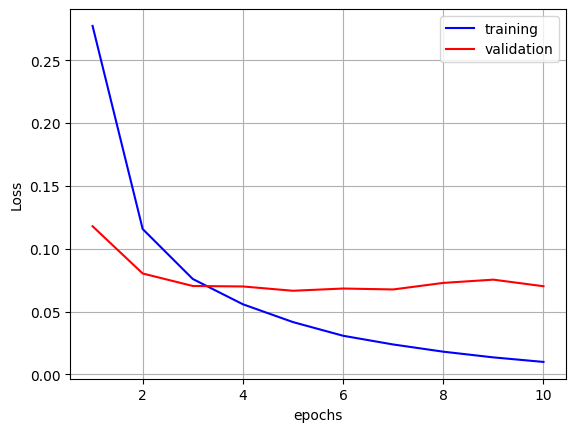

In [ ]:
import matplotlib.pyplot as plt

loss, val_loss = result.history['loss'], result.history['val_loss']
epochs = list(range(1, 11))
plt.plot(epochs, loss, 'b-',
         epochs, val_loss, 'r-');
plt.grid();
plt.xlabel('epochs');
plt.ylabel('Loss');
plt.legend(['training', 'validation']);

We zien dat 5 epochs inderdaad een goeie keuze was, want vanaf dan is er een lichte stijging te zien bij de loss van de validatieset (rode curve). Omdat het optimalisatiealgoritme stochastisch is (d.w.z. dat er gebruik wordt gemaakt van 'randomness'), krijgen we telkens andere curves, en zou het dus best kunnen dat de overfitting visueel al iets vroeger of later optreedt.

## 2.2. Data representations for neural networks

Neurale netwerken maken gebruik van **tensoren**, wat eenvoudigweg multidimensionale arrays zijn. De naam TensorFlow verwijst ook naar dit datatype.

Let op! De "dimensies" van een array noemt men in NumPy "assen" (Engels: axes), en het aantal dimensies of assen is de "rang" (Engels: rank) van een array.

### 2.2.1. Scalars

Een scalair of scalar is een tensor met 0 dimensies (Engels: rank-0 tensor).

In [ ]:
import numpy as np

x = np.array(np.pi)

print(x)
print(type(x))  # type is numpy ndarray
print(x.dtype)  # dtype is type van de elementen van de array
print(x.ndim)  # aantal dimensies = rank = 0
print(x.shape)  # shape is hier lege tuple
print(x.size)  # aantal elementen
# print(len(x))  # geeft error, want geen dimensies

3.141592653589793
<class 'numpy.ndarray'>
float64
0
()
1


### 2.2.2. Vectors

Een vector is een eendimensionale array (Engels: rank-1 tensor)

In [ ]:
v = np.array([12, 3, 6, 14, 7])

print(v)
print(type(v))  # type is numpy ndarray
print(v.dtype)  # dtype is type van de elementen van de array
print(v.ndim)  # aantal dimensies = rank = 1
print(v.shape)  # shape is hier tuple met 1 element
print(v.size)  # aantal elementen
print(len(v))  # lengte van de vector

[12  3  6 14  7]
<class 'numpy.ndarray'>
int64
1
(5,)
5
5


Opgelet! Het aantal dimensies kan verwijzen naar het aantal assen - in het geval van een vector is dat 1 - of naar het aantal elementen langs een as - in ons voorbeeld is dat 5.

### 2.2.3. Matrices

Een matrix is een tweedimensionale array (Engels: rank-2 tensor). Een matrix heeft dus 2 assen en meestal spreekt men over rijen en kolommen.

In [ ]:
M = np.array([[5, 78, 2, 34, 0],    # matrices krijgen vaak een hoofdletter als symbool
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

print(M)
print()
print(type(M))  # type is numpy ndarray
print(M.dtype)  # dtype is type van de elementen van de array
print(M.ndim)  # aantal dimensies = rank = 2
print(M.shape)  # shape is hier tuple met 2 elementen: (aantal rijen, aantal kolommen)
print(M.size)  # totaal aantal elementen = prod(M.shape)
print(len(M))  # aantal rijen = lengte van de eerste as!

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]

<class 'numpy.ndarray'>
int64
2
(3, 5)
15
3


### 2.2.4. ND arrays

We kunnen natuurlijk ook driedimensionale arrays definiëren, en arrays met meer dan 3 dimensies. In deep learning komen tensors voor van rang 0 tem 4, of zelfs 5 als er video data worden verwerkt.

In [ ]:
A = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]], dtype=float)

In [ ]:
print(A)
print()
print(type(A))  # type is numpy ndarray
print(A.dtype)  # dtype is type van de elementen van de array
print(A.ndim)  # aantal dimensies = rank = 3
print(A.shape)  # shape is hier tuple met 3 elementen
print(A.size)  # totaal aantal elementen = prod(M.shape)
print(len(A))  # aantal elementen langs de eerste as!

[[[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]

 [[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]

 [[ 5. 78.  2. 34.  0.]
  [ 6. 79.  3. 35.  1.]
  [ 7. 80.  4. 36.  2.]]]

<class 'numpy.ndarray'>
float64
3
(3, 3, 5)
45
3


**Samenvatting:**

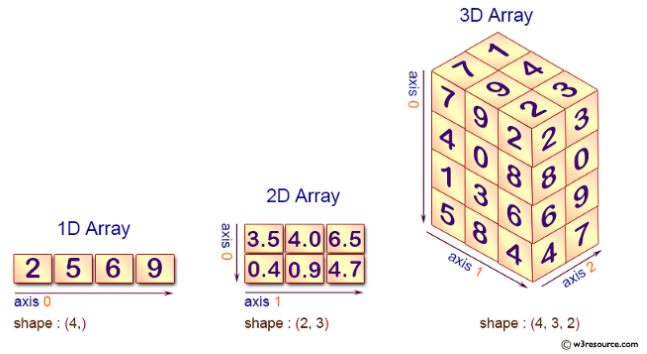

### 2.2.5. Key attributes

Een tensor wordt gedefineerd adhv 3 attributen:

*  de **rang**: het aantal assen of dimensies (attribuut ``ndim``)
*  de **vorm**: hjet aantal elementen langs elke as (attribuut ``shape``)
* het **datatype**: het datatype van de elementen (attribuut ``dtype``)

Let op! Alle elementen in een tensor zijn van hetzelfde datatype!

Laten we dat eens checken voor de arrays in de MNIST dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


De trainingset is dus een rank-3 tensor die 60000 matrices van 28 rijen en 28 kolommen bevat. Elke matrix komt overeen met een image die 'unsigned' integers van 8 bit bevat (i.e. `uint8`). D.w.z. dat de waarden van de elementen van de tensor tussen 0 en 255 liggen (want 2 tot de achtste macht is 256):

In [ ]:
print(2**8)  # 8 bit, dus 256 mogelijke waarden
print(train_images.min())  # min is nul
print(train_images.max())  # max is (256 - 1) want we starten bij nul

256
0
255


### 2.2.6. Manipulating tensors in NumPy

Wanneer we specifieke elementen selecteren in een array, dan maken we gebruik van *slices*. We spreken dan ook van **tensor slicing**.

Het vijfde label selecteren uit de trainingset:

In [ ]:
train_labels[4]  # 5e label (want we starten bij 0!)

9

Elfde t.e.m. honderdste image uit de trainingset selecteren:

In [ ]:
my_slice = train_images[10:100]  # index 10 telt mee, index 100 niet, maar we starten van 0!
#my_slice = train_images[10:100, :, :]  # geeft zelfde resultaat
#my_slice = train_images[10:100, 0:28, 0:28]  # geeft zelfde resultaat
my_slice.shape

(90, 28, 28)

Van alle images 14 x 14 pixels in het midden selecteren:

In [ ]:
center = train_images[:, 7:-7, 7:-7]
center.shape

(60000, 14, 14)

Van alle images 14 x 14 pixels onderaan rechts selecteren:

In [ ]:
bottom_right = train_images[:, 14:, 14:]
bottom_right.shape

(60000, 14, 14)

Opletten met assen die
 wegvallen!

In [ ]:
M = np.random.rand(5, 4)  # 5 x 4 matrix met random numbers tussen 0 en 1
print(M)

[[0.14101267 0.83611606 0.88715181 0.7073365 ]
 [0.2395203  0.28808707 0.672681   0.24910024]
 [0.3844213  0.59051107 0.32346057 0.90381812]
 [0.19586938 0.31380855 0.54249642 0.07905651]
 [0.5075316  0.13837618 0.16718742 0.60777763]]


In [ ]:
M[:, 1]  # 2e kolom = vector met 5 elementen

array([0.83611606, 0.28808707, 0.59051107, 0.31380855, 0.13837618])

In [ ]:
M[:, [1]]  # 2e komom als 5 x 1 matrix
# M[:, 1, np.newaxis]  # zelfde resultaat - newaxis voegt nieuwe as toe

array([[0.83611606],
       [0.28808707],
       [0.59051107],
       [0.31380855],
       [0.13837618]])

In [ ]:
M.max(axis=1)  # maximum langs axis 1 = maximum van elke rij = vector

array([0.88715181, 0.672681  , 0.90381812, 0.54249642, 0.60777763])

In [ ]:
M.max(axis=1, keepdims=True)  # maxixum van elke rij als 5 x 1 matrix
#M.max(axis=1)[:, np.newaxis]  # zelfde resultaat

array([[0.88715181],
       [0.672681  ],
       [0.90381812],
       [0.54249642],
       [0.60777763]])

### 2.2.7. The notion of data batches

In deep learning geeft de eerste as gewoonlijk het aantal samples aan, vandaar de Engelse naam **samples axis**. In onze MNIST dataset, bijvoorbeeld, is het aantal samples het aantal images van handgeschreven cijfers.

Omdat deep learning modellen meestal niet in staat zijn om de volledige dataset in zijn geheel te verwerken, splitsen we die op in **batches**. Het aantal samples in een batch noemen we de **batch size**. Vaak neemt men een macht van 2 als batch size.

Nemen we bijvoorbeeld een batch size van 128 voor de MNIST trainingset, dan is de eerste batch:

In [ ]:
batch_1 = train_images[:128]
batch_1.shape

(128, 28, 28)

De tweede batch is:

In [ ]:
batch_2 = train_images[128:256]
batch_2.shape

(128, 28, 28)

Algemeen krijgen we batch ``n`` als volgt:

In [ ]:
batch_size = 128
n = 3  # we starten bij 1
i = (n - 1) * batch_size + np.arange(batch_size)
# i = np.arange(batch_size * (n - 1), batch_size * n)  # geeft zelfde resultaat
batch_n = train_images[i]
# batch_n = train_images[batch_size * (n - 1) : batch_size * n]  # geeft zelfde resultaat
print(batch_n.shape)

(128, 28, 28)


De eerste as van een batch wordt in het Engels de **batch axis** genoemd. Het aantal elementen langs die as is dus gelijk aan de batch size.

### 2.2.8. Real-world examples of data tensors

- **Vector data** = rank-2 tensors (samples, features)
- **Tijdreeksen** = rank-3 tensors (samples, timesteps, features)
- **Images** = rank-4 tensors (samples, height, width, channels)
- **Videos** = rank-5 tensors (samples, frames, height, width, channels)


### 2.2.9. Vector data

In Machine Learning hebben we meestal met vector data gewerkt die in csv-files werden opgeslagen als tabellen, waarbij de rijen overeenkwamen met de samples en de kolommen met de features.

Voorbeelden:

- een dataset van 100000 mensen waarbij we leeftijd, gender en inkomen bijhouden. De dataset zal dus een tabel of rank-2 tensor zijn met 100000 rijen (samples) en 3 kolommen (features).
- een dataset met 500 tekstdocumenten waarbij we voor elk document bijhouden hoe vaak een woord voorkomt. Wanneer we in totaal 20000 woorden in rekening brengen, dan zal de dataset uit een matrix of rank-2 tensor bestaan met 500 rijen (samples) en 20000 kolommen (features). Herinner je dat we die matrix de document-term matrix (DTM) noemen.

### 2.2.10. Timeseries data or sequence data

Wanneer data een bepaalde volgorde hebben, zoals tijdstippen, dan is het zinvol om een tijdsas (Engels: time axis) te definiëren. Zo krijgen we een dataset die een rank-3 tensor is, zoals hieronder wordt afgebeeld. De afspraak is om de tweede as als tijdsas te definiëren.

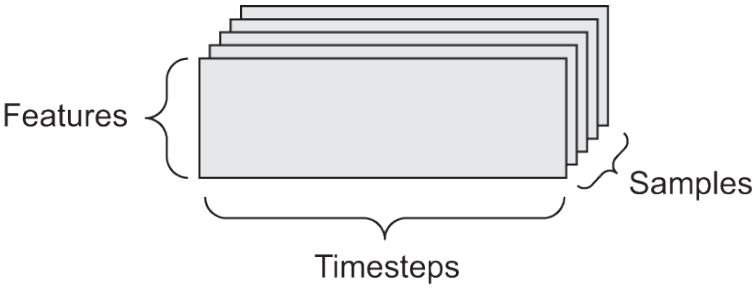

Voorbeelden:

- een dataset met prijzen van aandelen waarbij voor elke minuut de huidige prijs wordt opgeslagen samen met de hoogste en laagste prijs van de vorige minuut. Er worden 390 minuten per dag beschouwd en we hebben 250 dagen per jaar waarop aandelen worden verhandeld. De dataset is dus een rank-3 tensor met shape (250, 290, 3), waarbij het aantal dagen overeenkomt met het aantal samples, de minuten de tijdsas voorstellen, en de features de 3 prijzen zijn die worden bijgehouden.

- een dataset van tweets waarbij één tweet bestaat uit een reeks van 280 tekens uit een alfabet met 128 unieke karakters. Elk karakter is een binaire vector van 128 bits. Wanneer we 1 miljoen tweets hebben, dan is de dataset een rank-3 tensor met shape (1000000, 280, 128), waarbij het aantal tweets gelijk is aan het aantal samples en de tijdsas hier de volgorde van de 280 tekens bijhoudt.

### 2.2.11. Image data

In dit vak zullen we vooral met images werken. Herinner je dat de channels van RGB-images de 3 kleuren rood, groen en blauw weergeven. Bij HSV-images zijn er ook 3 kanalen, bij CMYK-images zijn er 4. Zwart-wit images hebben slechts 1 kanaal: de grijswaarde. Soms bevatten images nog een extra kanaal die de transparantie regelt, het zogenaamde alpha-channel.

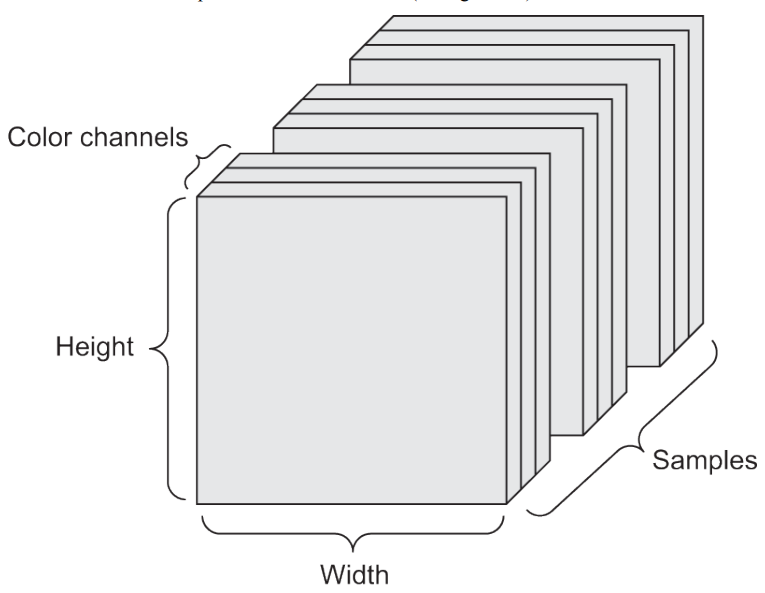

Wat betreft de channels zijn er 2 conventies:
- *channel-last*: (samples, height, width, channels)
- *channel-first*: (samples, channels, height, width)

TensorFlow past de channel-last conventie toe; Keras ondersteunt beiden.

### 2.2.12. Video data

Een video bestaat uit een opeenvolging van images, frames genaamd. Hier is er dus ook een tijdsas die de volgorde van de frames bijhoudt. Op die manier krijgen we rank-5 tensors met shape (samples, frames, height, width, color_depth).

Bijvoorbeeld een YouTube filmpje van 144 op 256 dat 1 minuut duurt en 4 frames per seconde bevat is een tensor met shape (240, 144, 256, 3). Een batch van 4 zo'n filmpjes is dus een rank-5 tensor met shape (4, 240, 144, 256, 3) of dus 106.168.320 elementen. Als de tensor uit ``float32`` waarden bestaat, kommagetallen van 32 bit, dan is die tensor 405 MB groot! In het dagelijks leven zijn videos (gelukkig) in een veel lichter en gecomprimeerd formaat opgeslagen, zoals bijv. MPEG.

## 2.3. The gears of neural networks: tensor operations

Alle transformaties die neurale netwerken toepassen op data kunnen teruggebracht worden tot een handvol **tensoroperaties** of tensorfuncties.

Neem bijvoorbeeld de eerste Keras laag uit ons neurale netwerk om de MNIST dataset te classificeren:

```python
keras.layers.Dense(512, activation="relu")
```

In feite kan je die laag interpreteren als een functie die in dit geval het volgende doet:

```python
output = relu(dot(inputtensor, W) + b)
```

Dit doet ons denken aan het Perceptron algoritme en logistic regression:

- ``dot`` is de matrixvermenigvuldiging tussen de inputtensor en de matrix ``W`` met de gewichten of parameters;
- de bias vector ``b`` wordt opgeteld bij het resultaat van die matrixvermenigvuldiging;
- in plaats van de Heaviside functie of de sigmoïdefunctie is de activatiefunctie hier ``relu``, de "REctified Linear Unit". Functie ``relu(x)`` wordt gedefinieerd als ``max(x, 0)`` en zet dus alle negatieve waarden op nul.

### 2.3.1. Element-wise operations

Operaties die op elk element van een matrix of op de overeenkomstige elementen van twee matrices worden uitgevoerd zijn uitermate geschikt voor parallelle implementaties, ook wel gevectoriseerde implementaties genoemd, een term die is afgeleid van de *vector processor* supercomputer architectuur uit de jaren 1970-1990. Zoals we al weten kunnen we in NumPy gebruik maken van **gevectoriseerde expressies en functies** die het toepassen van lussen tot een minimum beperken. Niet alleen wordt onze code hierdoor compacter en meer leesbaar, de expressies worden ook (veel) sneller uitgevoerd omdat NumPy achterliggend gebruik maakt van BLAS routines (Basic Linear Algebra Subprograms) die in Fortran of C zijn geprogrammeerd en zeer efficiënt zijn. Op gelijkaardige manier maakt TensorFlow gebruik van volledig gevectoriseerde CUDA implementaties voor GPUs.

Als test implementeren we de ReLU functie en de matrix optelling uit voorgaand voorbeeld mbv lussen, waarna we de snelheid van uitvoering vergelijken met de NumPy implementatie zonder lussen.

In [ ]:
def naive_relu(x):
    assert x.ndim == 2  # x moet een matrix zijn
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert x.ndim == 2  # x moet een matrix zijn
    assert x.shape == y.shape  # x en y moeten dezelfde vorm hebben
    z = np.zeros(x.shape)  # initialiseren van z = x + y
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = x[i, j] + y[i, j]
    return z

In [ ]:
import numpy as np
from time import time

n = 1_000
x = np.random.randn(n, n)
y = np.random.randn(n, n)

print("RELU")

start = time()
naive_relu(x)
print("loops:", time() - start, "sec")

start = time()
np.maximum(x, 0.)
print("vectorized:", time() - start, "sec")

print("ADD")

start = time()
naive_add(x, y)
print("loops:", time() - start, "sec")

start = time()
x + y
print("vectorized:", time() - start, "sec")

RELU
loops: 0.758152961730957 sec
vectorized: 0.007144927978515625 sec
ADD
loops: 0.5390076637268066 sec
vectorized: 0.0032558441162109375 sec


Conclusie: de gevectoriseerde NumPy expressies zijn in dit voorbeeld meer dan 100 keer sneller dan de overeenkomstige standaard Python implementaties met lussen!

### 2.3.2. Broadcasting

In het voorbeeld van de `Dense` layer met `relu` als activatiefunctie wordt vector `b` opgeteld bij een matrix. Onze `naive_add` functie werkt echter enkel als beide inputmatrices dezelfde vorm hebben. Laten we die functie aanpassen zodat `y` ook een vector kan zijn met aantal elementen gelijk aan het aantal kolommen in `x`.

In [ ]:
def naive_add(x, y):
    assert x.ndim == 2  # x moet een matrix zijn
    assert x.shape == y.shape or \
           (y.ndim == 1 and x.shape[1] == len(y))  # y mag ook vector zijn
    z = np.zeros(x.shape)  # initialiseren van z = x + y
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            try:
                z[i, j] = x[i, j] + y[i, j]
            except IndexError:
                z[i, j] = x[i, j] + y[j]
    return z

In [ ]:
X = np.ones((5, 3))  # matrix X
Y = np.ones((5, 3))  # matrix Y
y = np.arange(3)  # vector y

print(naive_add(X, Y))
print()
print(naive_add(X, y))

[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In NumPy kunnen we de vector `y` uitbreiden naar een matrix met dezelfde shape als matrix `X` m.b.v. de functie `tile`:

In [ ]:
X + np.tile(y, (len(X), 1))

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Dat uitbreiden van vector `y` noemt men **broadcasting** en NumPy doet dit automatisch voor ons:

In [ ]:
X + y

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Broadcasting werkt ook voor functies, bijv. de `maximum` functie:

In [ ]:
x = np.ones((5, 3))
y = np.arange(3)
np.maximum(x, y)

array([[1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.]])

In het algemeen wordt broadcasting toegepast bij elementsgewijze operaties tussen 2 tensoren met gelijk aantal elementen langs de laatste assen:

``(a, b, n, n+1, n+2, ..., m) . (n, n+1, n+2, ..., m) -> (a, b, n, n+1, n+2, ..., m)``

In [ ]:
x = np.random.randn(64, 3, 32, 10)
y = np.random.randn(32, 10)

new_shape = x.shape[:2] + (1, ) * y.ndim  # (64, 3) + (1, ) * 2
print(new_shape)

z1 = np.maximum(x, np.tile(y, new_shape))
z2 = np.maximum(x, y)  # functie past automatisch broadcasting toe
print(np.all(z1 == z2))

(64, 3, 1, 1)
True


### 2.3.3. Tensor product

Met tensor product wordt de [**matrixvermenigvuldiging**](https://nl.wikipedia.org/wiki/Matrixvermenigvuldiging) bedoeld. Onderstaande figuur toont schematisch weer hoe de matrixvermenigvuldiging werkt. Wanneer matrix `X` wordt vermenigvuldigd met matrix `Y`, dan wordt het inwendig of scalair product berekend tussen enerzijds alle rijen van `X` en anderzijds alle kolommen van `Y`. Dit betekent dat het aantal kolommen in `X` moet gelijk zijn aan het aantal rijen in `Y`. Concreet, als `X` shape `(a, b)` heeft en `Y` shape `(b, c)`, dan heeft de resulterende matrix `Z` shape `(a, c)`.

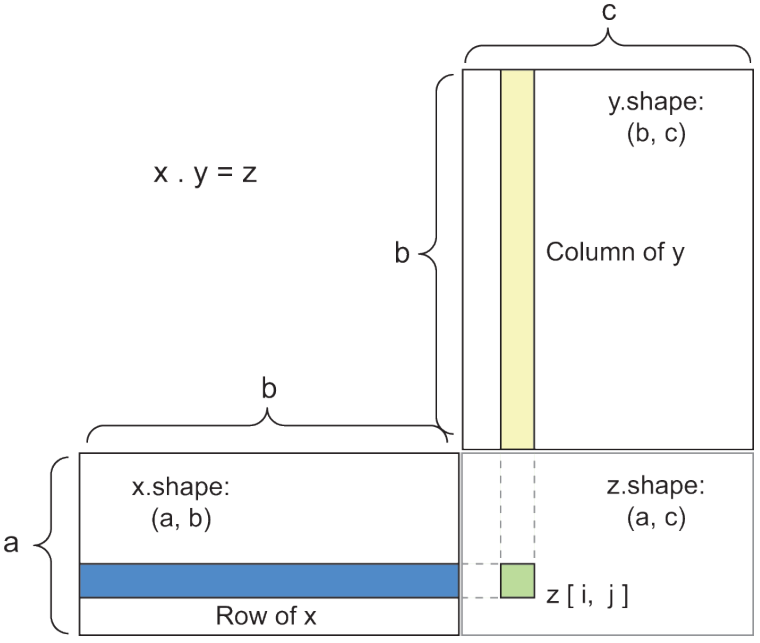

Maar wat is nu ook alweer het inwendig product tussen twee vectoren? Wel, dat is de som van het product van de overeenkomstige elementen van de twee vectoren. Een voorbeeldje illustreert dit:

In [ ]:
def inner_product(x, y):
    assert x.ndim == 1
    assert y.ndim == 1
    assert len(x) == len(y)
    return sum([x[i] * y[i] for i in range(len(x))])

In [ ]:
x = np.arange(4)
y = np.arange(10, 50, 10)
print(x)
print(y)
print(inner_product(x, y))

[0 1 2 3]
[10 20 30 40]
200


De matrixvermenigvuldiging kunnen we dan implementeren gebruik makend van functie `inner_product`:

In [ ]:
def matrix_product(X, Y):
    assert X.ndim == 2
    assert Y.ndim == 2
    assert X.shape[1] == Y.shape[0]  # aantal kolommen in X moet gelijk zijn aan aantal rijen in Y
    Z = np.zeros((X.shape[0], Y.shape[1]))  # output Z initialiseren
    for i in range(X.shape[0]):  # rijen van X doorlopen
        for j in range(Y.shape[1]):  # kolommen van Y doorlopen
            Z[i, j] = inner_product(X[i, :], Y[:, j])  # scalair product tussen rij i van X en kolom j van Y
    return Z

In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6]])
Y = np.array([[1, 2, 3, 4], [5, 6, 7 ,8]])
print(X)
print()
print(Y)
print()
print(matrix_product(X, Y))

[[1 2]
 [3 4]
 [5 6]]

[[1 2 3 4]
 [5 6 7 8]]

[[11. 14. 17. 20.]
 [23. 30. 37. 44.]
 [35. 46. 57. 68.]]


Maar zoals we al weten hebben we in NumPy de functies `inner` en `dot` voor het berekenen van het inwendig product en het uitvoeren van de matrixvermenigvuldiging:

In [ ]:
np.inner(x, y)

200

In [ ]:
np.dot(X, Y)

array([[11, 14, 17, 20],
       [23, 30, 37, 44],
       [35, 46, 57, 68]])

De matrixvermenigvuldiging mag niet verward worden met de elementsgewijze vermenigvuldiging die in NumPy via de standaard `*` operator wordt uitgevoerd:

In [ ]:
X * X  # X**2 geeft hetzelfde resultaat

array([[ 1,  4],
       [ 9, 16],
       [25, 36]])

Ook hier is **broadcasting** van toepassing:

``(a, b, c, d) . (d, ) -> (a, b, c)``

``(a, b, c, d) . (d, e) -> (a, b, c, e)``

In [ ]:
X = np.random.rand(3, 4, 5, 6)
Y = np.random.rand(6, 7)

Z = np.dot(X, Y)
Z.shape

(3, 4, 5, 7)

### 2.3.4. Tensor reshaping

In het voorbeeld van de MNIST dataset hebben we de trainingset een nieuwe vorm gegeven m.b.v. NumPy functie `reshape`:

```python
train_images = train_images.reshape((60000, 28 * 28))
```

Concreet hebben we van de rank-3 tensor een rank-2 tensor gemaakt waarin elke image werd omgezet naar een vector waarin alle pixels achter elkaar werden geplaatst.

Laten we eens een eenvoudig voorbeeldje bekijken om beter te begrijpen wat er juist gebeurt als we `reshape` toepassen.

In [ ]:
X = np.array([[0, 1], [2, 3], [4, 5]])
print(X)  # shape is (3, 2)
print()
print(X.reshape((2, 3)))

[[0 1]
 [2 3]
 [4 5]]

[[0 1 2]
 [3 4 5]]


We zien dat bij het 'reshapen' de matrices rij per rij worden doorlopen. Dit is zoals de programmeertaal C matrices in het geheugen opslaat. In NumPy wordt dat aangegeven met de optionele inputparameter `order` die dus standaard op `'c'` staat. In FORTRAN worden de matrices kolomsgewijs opgeslagen. Willen we dat NumPy de matrices kolom per kolom doorloopt, dan moeten we `order='f'` opgeven. Laten we het verschil eens bekijken:

In [ ]:
print(X.reshape((2, 3), order='c'))  # default is de C manier
print()
print(X.reshape((2, 3), order='f'))  # de FORTRAN manier

[[0 1 2]
 [3 4 5]]

[[0 4 3]
 [2 1 5]]


Eigenlijk kunnen we het verschil tussen beiden nog beter zien als we de functie `flatten` gebruiken die de array omzet naar een vector:

In [ ]:
print(X.flatten(order="c"))  # default -> zet de rijen achter elkaar
print(X.flatten(order="f"))  # zet de kolommen achter elkaar

[0 1 2 3 4 5]
[0 2 4 1 3 5]


Een andere speciale vorm van 'reshapen' is het transponeren van een matrix, dit is het omwisselen van rijen en kolommen:

In [ ]:
X.T  # rijen worden kolommen: X[i, :] -> X[:, i]

array([[0, 2, 4],
       [1, 3, 5]])

### 2.3.5. Geometric interpretation of tensor operations

Omdat tensoren kunnen worden geïnterpreteerd als coördinaten van punten in één of andere geometrische ruimte, hebben ook tensoroperaties een geometrische interpretatie.

Nemen we als voorbeeld 2 vectoren `v1` en `v2` die elk 2 elementen bevatten. Die elementen kunnen we interpreteren als de coördinaten van 2 punten in een 2D assenstelsel:

In [ ]:
v1 = np.array([0.5, 1])
v2 = np.array([1, 0.5])

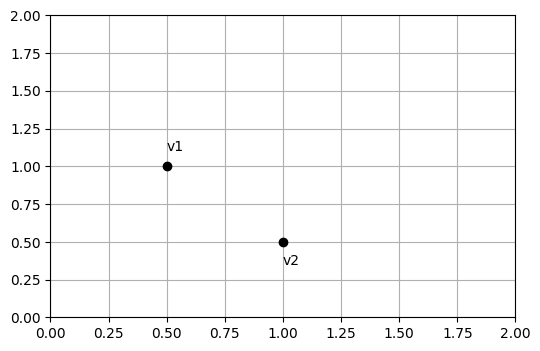

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

plt.plot(v1[0], v1[1], 'ko');
plt.plot(v2[0], v2[1], 'ko');
plt.text(x=v1[0], y=v1[1] + 0.1, s='v1');
plt.text(x=v2[0], y=v2[1] - 0.15, s='v2');
plt.xlim((0, 2));
plt.ylim((0, 2));
plt.grid();

Als we vanuit de oorsprong van het assenstelsel een pijl trekken naar die punten, dan visualiseren we de vectoren.

In [ ]:
def plot_arrow(v, start=[0, 0], color='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.arrow(x=start[0], y=start[1], dx=v[0], dy=v[1],
              length_includes_head=True, head_width=0.05, color=color);

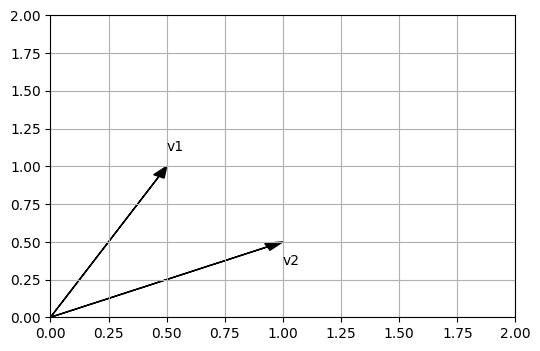

In [ ]:
plot_arrow(v1)
plot_arrow(v2)

plt.text(x=v1[0], y=v1[1] + 0.1, s='v1');
plt.text(x=v2[0], y=v2[1] - 0.15, s='v2');

plt.xlim((0, 2));
plt.ylim((0, 2));
plt.grid();

Wanneer we nu die 2 vectoren optellen, dan krijgen we een nieuwe vector:

In [ ]:
v3 = v1 + v2
v3

array([1.5, 1.5])

Grafisch vinden we de nieuwe vector `v3` door vector `v2` te combineren met `v1`:

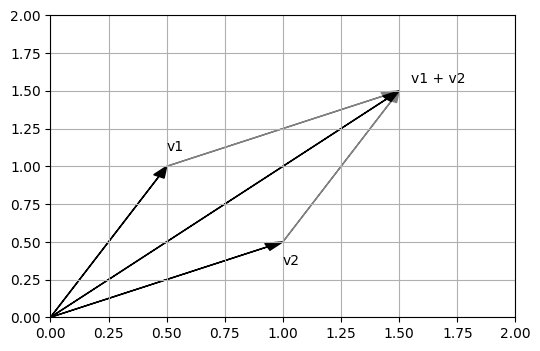

In [ ]:
plot_arrow(v1)
plot_arrow(v2)
plot_arrow(v1, v2, 'gray')
plot_arrow(v2, v1, 'gray')
plot_arrow(v3)

plt.text(x=v1[0], y=v1[1] + 0.1, s='v1');
plt.text(x=v2[0], y=v2[1] - 0.15, s='v2');
plt.text(x=v3[0] + 0.05, y=v3[1] + 0.05, s='v1 + v2');

plt.xlim((0, 2));
plt.ylim((0, 2));
plt.grid();

In feite verschuiven we het punt `v1` adhv vector `v2`. Dat is ook effectief wat de optelling van tensoren geometrisch betekent: een verschuiving of **translatie**.

Laten we dat even illustreren met een vierkant $P$ dat wordt gedefinieerd adhv de coördinaten van de 4 hoekpunten:

In [ ]:
P = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
print(P)

[[0 0]
 [0 1]
 [1 1]
 [1 0]]


Als we het originele vierkant plotten en ernaast hetzelfde vierkant waar `v1` is opgeteld bij de coördinaten, dan zien we dat het originele vierkant inderdaad is verschoven over een afstand bepaald door `v1`:

In [ ]:
def plot_polygon(xy, ax=None, color='r'):
    ax = plt.gca() if ax is None else ax
    ax.add_patch(plt.Polygon(xy=xy, closed=True, fc=color, ec='k'));

def plot_axes(polygon1, polygon2, xlim, ylim):
    _, (ax1, ax2) = plt.subplots(1, 2, sharey=True);
    plot_polygon(polygon1, ax1)
    plot_polygon(polygon2, ax2)
    ax1.plot(xlim, [0, 0], 'k-')
    ax1.plot([0, 0], ylim, 'k-')
    for ax in (ax1, ax2):
        ax.plot(xlim, [0, 0], 'k-')
        ax.plot([0, 0], ylim, 'k-')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.grid()
        ax.set_axisbelow(True)
        ax.set_aspect('equal')
    return ax1, ax2

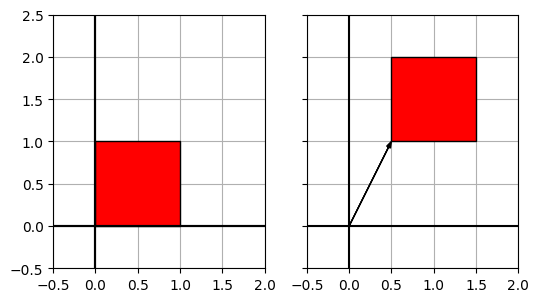

In [ ]:
_, ax2 = plot_axes(P, P + v1, (-0.5, 2), (-0.5, 2.5))
plot_arrow(v1, ax=ax2)

Het vierkant kunnen we ook draaien of **roteren** over een hoek $\theta$ door de coördinaten te vermenigvuldigen met rotatiematrix $R$:

> $R . P^T$

met

> $
  R =
  \left[ {\begin{array}{cc}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta) \\
  \end{array} } \right]
$

We nemen bijvoorbeeld $\theta = 45°$:

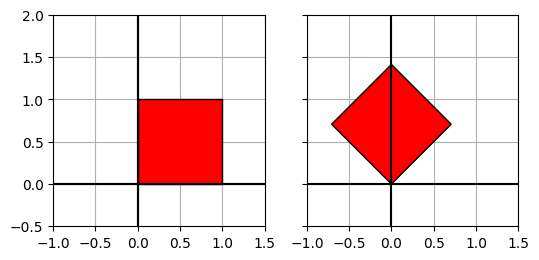

In [ ]:
theta = np.pi / 4  # 45° is pi/4 rad
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

plot_axes(P, np.dot(R, P.T).T, (-1, 1.5), (-0.5, 2));

Pas op! Wanneer we de functies `cos` en `sin` gebruiken, dan moeten we de hoek $\theta$ in radialen opgeven!

Wanneer we de coördinaten vermenigvuldigen met een diagonaal matrix $D$, een matrix met overal nullen tenzij op de diagonaal, dan **herschalen** we het vierkant:

> $D . P^T$

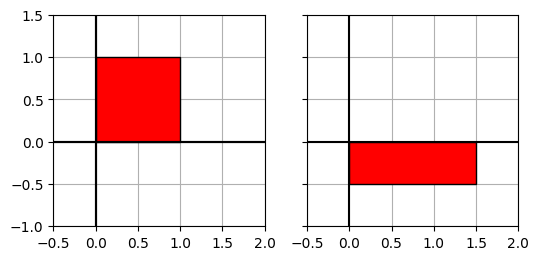

In [ ]:
D = np.array([[1.5, 0],    # 1.5 x breder
              [0, -0.5]])  # -0.5 x hoger

plot_axes(P, np.dot(D, P.T).T, (-0.5, 2), (-1, 1.5));

Als we de coördinaten van het vierkant vermenigvuldigen met een vierkante matrix $W$ met willekeurige gewichten, dan voeren we een **lineaire transformatie** uit:

> $W . P^T$

Bemerk dat roteren en herschalen ook lineaire transformaties zijn.

In [ ]:
np.random.seed(2020)
W = np.ones((2, 2)) + 2 * np.random.randn(2, 2)
print(W)

[[-2.53769141  1.15110454]
 [-1.26125941 -0.30286033]]


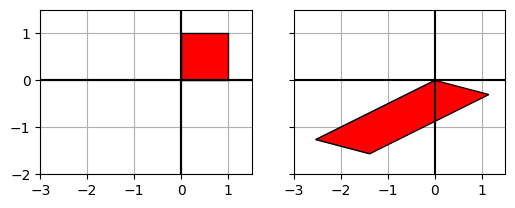

In [ ]:
plot_axes(P, np.dot(W, P.T).T, (-3, 1.5), (-2, 1.5));

Een **affiene transformatie** combineert een lineaire transformatie met een translatie door vector $b$ op te tellen:

> $W . P^T + b$

Dat is de transformatie die wordt uitgevoerd door een `Dense` layer zonder activiatiefunctie.

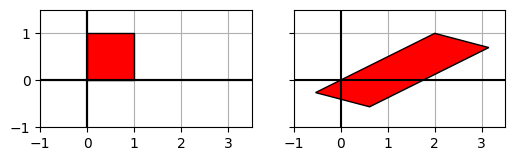

In [ ]:
b = np.array([2, 1])
plot_axes(P, np.dot(W, P.T).T + b, (-1, 3.5), (-1, 1.5));

Wanneer ook de ReLU functie wordt toegepast, dan worden alle negatieve coördinaten op nul gezet:

> `relu`$(W.P^T+b)$

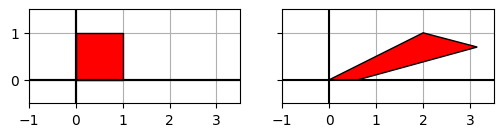

In [ ]:
relu = lambda x: np.maximum(x, 0.0)
plot_axes(P, relu(np.dot(W, P.T).T + b), (-1, 3.5), (-0.5, 1.5));

Het linker punt van het affien getransformeerde vierkant heeft enkel negatieve coördinaten en 'verschuift' dus naar $(0,0)$; bij het punt onderaan is de y-coördinaat negatief en dat wordt dus ook nul.

Waarom hebben we activatiefuncties nodig? Omdat het anders geen zin heeft om meerdere lagen in een neuraal netwerk te definiëren. Stel dat we 2 lagen hebben zonder activatiefunctie, dan kunnen we het achtereenvolgens toepassen van 2 affiene transformaties als volgt schrijven:

> $W_2 . (W_1 . P^T + b_1) + b_2 = W_2 . W_1 . P^T + W_2 . b_1 + b_2 = W . P^T + b$

met

> $W = W_2 . W_1$

en

> $b = W_2 . b_1 + b_2$

De twee opeenvolgende affiene transformaties zijn dus eigenlijk één affiene transformatie.

Een voorbeeld om dat te illustreren:

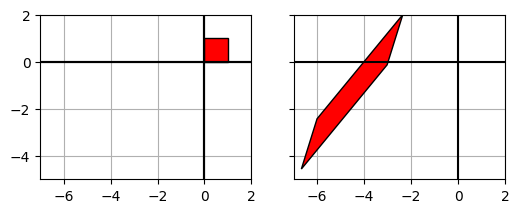

In [ ]:
np.random.seed(2020)

W1 = np.ones((2, 2)) + 2 * np.random.randn(2, 2)
b1 = np.random.randn(2)
P1 = np.dot(W1, P.T).T + b1

W2 = np.ones((2, 2)) + 2 * np.random.randn(2, 2)
b2 = np.random.randn(2)
P2 = np.dot(W2, P1.T).T + b2

plot_axes(P, P2, (-7, 2), (-5, 2));

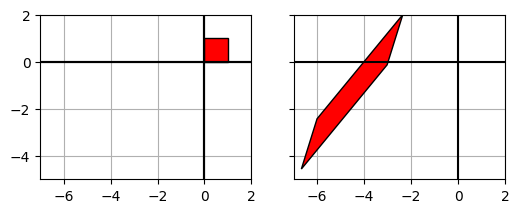

In [ ]:
W = np.dot(W2, W1)
b = np.dot(W2, b1) + b2
P2 = np.dot(W, P.T).T + b
plot_axes(P, P2, (-7, 2), (-5, 2));

Algemeen kunnen we een neural netwerk met meerdere lagen zonder activatiefuncties vervangen door een equivalent model met slechts 1 laag! Of anders gezegd, het meerlagig model zonder activatiefuncties is in werkelijkheid een éénlagig lineair model zoals het perceptron model. Willen we dus complexe niet-linaire problemen kunnen oplossen, dan hebben we **niet-linaire activatiefuncties** nodig...

**OPDRACHT**

Neem een driehoek met coördinaten van de hoekpunten gelijk aan $(0,0)$, $(0,1)$ en $(1,0)$. Verschuif de driehoek 1 eenheid in de x-richting en 1 eenheid in de y-richting. Roteer ook de driehoek over 30° en maak hem 3 keer hoger en 2 keer breder.

Voer de transformaties eerst afzonderlijk uit. Probeer ze daarna in één keer uit te voeren met één affiene transformatie!

In [ ]:
D = np.array([[0, 0], [0, 1], [1, 0]])
print(D)

[[0 0]
 [0 1]
 [1 0]]


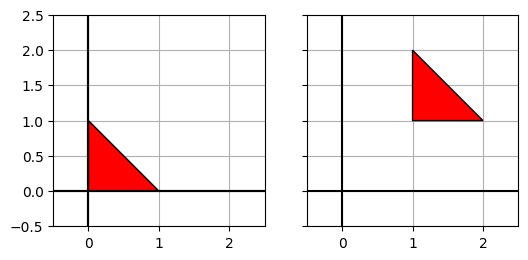

In [ ]:
# de translatie
v = np.array([1, 1])
plot_axes(D, D + v, (-0.5, 2.5), (-0.5, 2.5));

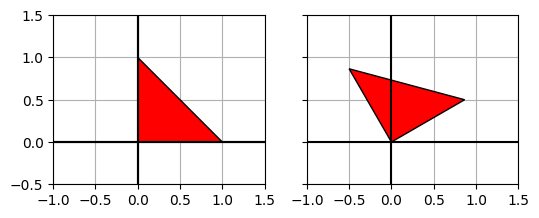

In [ ]:
# de rotatie
theta = np.pi / 6  # 30° is pi/6 rad
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

plot_axes(D, np.dot(R, D.T).T, (-1, 1.5), (-0.5, 1.5));

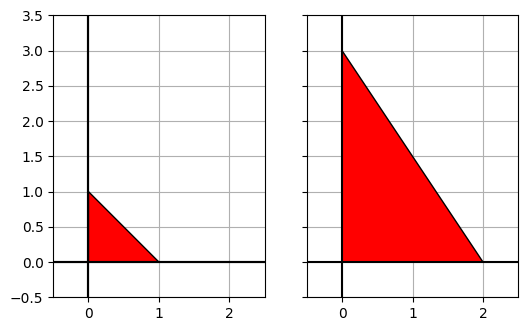

In [ ]:
# de herschaling
H = np.array([[2, 0],   # 2 x breder
              [0, 3]])  # 3 x hoger

plot_axes(D, np.dot(H, D.T).T, (-0.5, 2.5), (-0.5, 3.5));

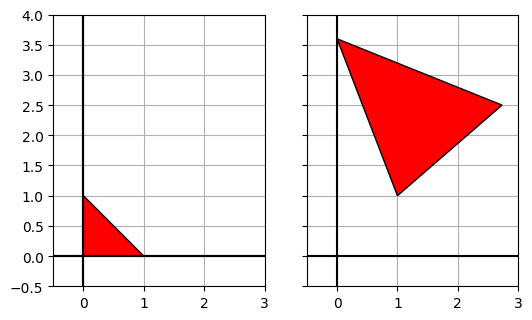

In [ ]:
# alle transformaties samen

from numpy.linalg import multi_dot as mdot

plot_axes(D, mdot((H, R, D.T)).T + v, (-0.5, 3), (-0.5, 4));

### 2.3.6. A geometric interpretation of deep learning

Een neuraal netwerk is eigenlijk niks anders dan een opeenvolging van tensoroperaties die de inputdata (geometrisch) transformeren. Alleen gaat het bij deep learning niet over een simpel vierkant met vier punten dat we in twee dimensies kunnen voorstellen, maar om een meerdimensionaal oppervlak, een **manifold** genaamd, die wordt voorgesteld in een meerdimensonale ruimte. Het neurale netwerk transformeert de manifold van de inputdata tot output die voor ons betekenis heeft, net zoals we een prop papier ontvouwen tot een effen blad.

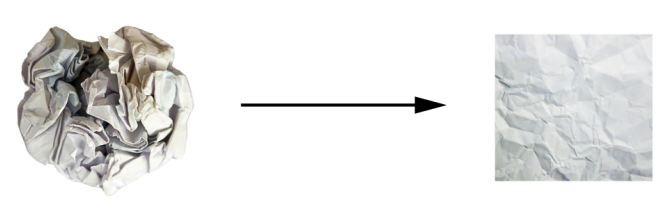

Binaire classificatie in drie dimensies zouden we dus kunnen voorstellen als een blauw en een rood blad papier die samen verfrommeld zijn tot een prop. Om de twee papieren netjes van elkaar te kunnen scheiden, moeten we de prop stap voor stap uit elkaar halen. Dat is ook wat een neuraal netwerk feitelijk doet, maar dan wel op een abstract wiskundige manier. In het volgende punt leggen we uit hoe neurale netwerken de meest geschikte stappen afleiden uit de trainingsdata. Of anders gezegd, hoe neurale netwerken 'leren' om de optimale opeenvolging van transformaties te doorlopen.

## 2.4. The engine of neural networks: gradient-based optimization

In de vorige paragraaf zagen we hoe elke laag in een neuraal netwerk de inputdata transformeert:

```python
output = activation(dot(W, data) + b)
```

We weten ondertussen al dat `W` de gewichten zijn en `b` de bias. Die `W` wordt soms ook de *kernel* genoemd. Samen vormen `W` en `b` de **parameters** die zullen geoptimaliseerd worden, want initieel worden ze opgevuld met willekeurige waarden: **random initialization**. Het optimaliseren van de parameters is een iteratief proces dat men het *trainen* van het model noemt. De **training loop** bestaat uit 4 stappen:

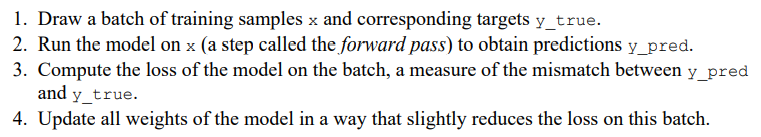

Stappen 1 tem 3 kunnen uitgevoerd worden met tensor slicing en met de tensoroperaties die we in de voorgaande paragraaf hebben besproken. In deze sectie gaan we dieper in op stap 4: het updaten van de gewichten mbv **gradient descent**. Dit algoritme hebben we al uitvoerig besproken in het vak Machine Learning. In deep learning passen we hetzelfde algoritme toe, maar nu op meerlagige modellen. Het updaten van de gewichten is daardoor iets minder vanzelfsprekend. Maar gelukkig kan het **backpropagation** algoritme ons hierbij helpen!

### 2.4.1. What's a derivative?

We weten ondertussen al dat een gradiënt een veralgemening is van het begrip "afgeleide" van een functie. Maar wat is een afgeleide?

Een functie $f$ noteren we algemeen als volgt:

> $y = f(x)$

Stel dat we bij de input $x$ van de functie een kleine waarde $\epsilon$ optellen, dan krijgen we een nieuwe waarde voor output $y$. Als onze functie $f$ echter continu is, d.w.z. er zijn geen abrupte sprongen in $f$, dan zal een kleine verandering in $x$ ook een slechts een kleine verandering in $y$ teweegbrengen. We kunnen wiskundig bewijzen dat de nieuwe waarde voor $y$ als volgt kan benaderd:

> $f(x+\epsilon) = f(x) + a . \epsilon$

Het rechterlid is eigenlijk de vergelijking van een rechte met richtingscoëfficiënt $a$ die gelijk is aan:

> $a = \frac{f(x+\epsilon) - f(x)}{\epsilon}$

Deze vergelijking vinden we door $f(x)$ en $\epsilon$ naar het ander lid te brengen. Wanneer $\epsilon$ infinitesimaal klein is, d.w.z. nul benadert, dan is die $a$ per definitie de afgeleide $f'(x)$ van de functie $f$ in het punt $x$:

> $f'(x) = \frac{dy}{dx} = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}$


**VOORBEELD**

Laten we dat eens demonstreren met Python code. Als voorbeeld nemen we de cosinusfunctie:

```python
y = cos(x)
```
We kijken naar `x = 1`en nemen `epsilon_x = 0.5`. We krijgen dan:

```python
epsilon_y = cos(x + epsilon_x)
```

Uit onze wiskundelessen van het middelbaar herinneren we ons dat de afgeleide van $cos(x)$ gelijk is aan $-sin(x)$. We kunnen `epsilon_y` dus als volgt gaan benaderen:

```python
epsilon_y_approx = y - sin(x) * epsilon_x
```
De plot hieronder stelt het grafisch voor:

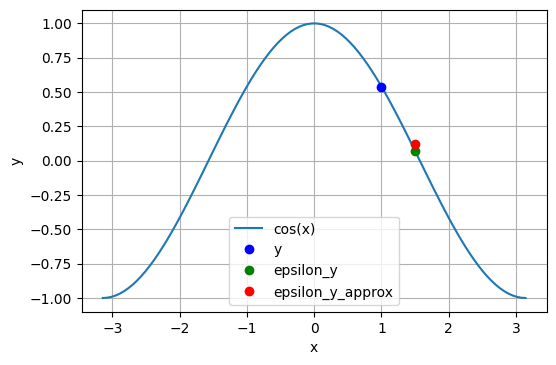

In [ ]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# plot van cos(x) over interval [-pi, pi]
x_plot = np.linspace(-np.pi, np.pi, 100)
plt.plot(x_plot, np.cos(x_plot));

# plot van de 2 punten
x = 1
y = np.cos(x)
epsilon_x = 0.5
epsilon_y = np.cos(x + epsilon_x)
epsilon_y_approx = y - np.sin(x) * epsilon_x
plt.plot(x, y, 'bo', x + epsilon_x, epsilon_y, 'go', x + epsilon_x, epsilon_y_approx, 'ro')

# grafiek opmaken
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['cos(x)', 'y', 'epsilon_y', 'epsilon_y_approx']);

We zien dat het rode punt met de benaderde waarde voor $cos(x+\epsilon)$ inderdaad vrij dicht licht bij het groene punt dat de exacte waarde weergeeft. Laten we nu ook nog eens dezelfde oefening doen voor $x-\epsilon$ en beide rode punten verbinden met een rechte lijn:

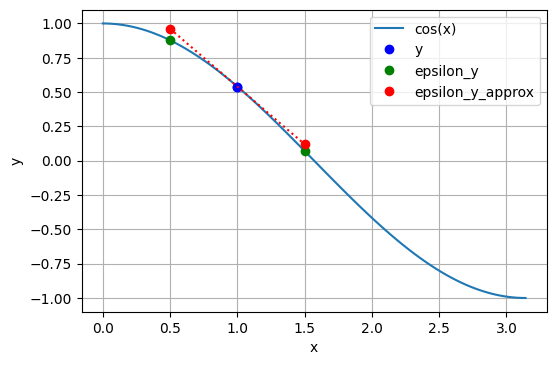

In [ ]:
# plot van cos(x) over interval [0, pi]
x_plot = np.linspace(0, np.pi, 100)
plt.plot(x_plot, np.cos(x_plot));

# (x, y)
x = 1
y = np.cos(x)
epsilon_x = 0.5

# x + epsilon
epsilon_y = np.cos(x + epsilon_x)
epsilon_y_approx = y - np.sin(x) * epsilon_x
plt.plot(x, y, 'bo', x + epsilon_x, epsilon_y, 'go', x + epsilon_x, epsilon_y_approx, 'ro')

# x - epsilon
epsilon_y = np.cos(x - epsilon_x)
epsilon_y_approx2 = y + np.sin(x) * epsilon_x
plt.plot(x, y, 'bo', x - epsilon_x, epsilon_y, 'go', x - epsilon_x, epsilon_y_approx2, 'ro')

# punten verbinden
plt.plot([x - epsilon_x, x + epsilon_x], [epsilon_y_approx2, epsilon_y_approx], 'r:')


# grafiek opmaken
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['cos(x)', 'y', 'epsilon_y', 'epsilon_y_approx']);

We zien dat de lijn die de twee rode punten verbindt de blauwe curve raakt in het punt $(x,y)$. En dat is ook exact wat de afgeleide $f'(x)$ is: **de richtingscoëfficiënt van de raaklijn** in het punt $(x,y)$!

**OPDRACHT**

Probeer dat nu zelf eens uit met de volgende functie:

> $f(x) = y = x^2$.

Plot die functie uit over het interval $[-3, 3]$ en teken de raaklijnen in de punten $(-2,4)$, $(0,0)$ en $(2,4)$.

Zoals je weet uit de wiskundelessen is de afgeleide van deze functie gelijk aan:

> $f'(x) = \frac{dy}{dx} = 2x$

Maak bij het programmeren gebruik van een functie zodat je niet moet copy-pasten!

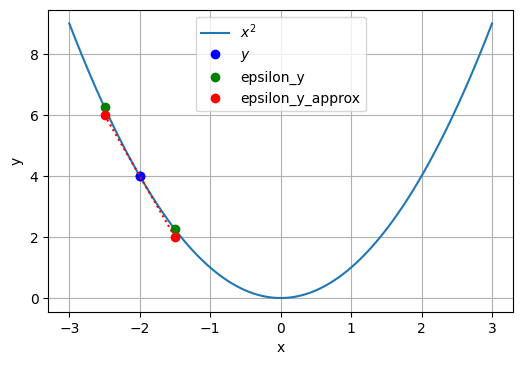

In [ ]:
# plot van x² over interval [-3, 3]
x_plot = np.linspace(-3, 3, 100)
plt.plot(x_plot, np.square(x_plot));

# (x, y)
x = -2
y = np.square(x)
epsilon_x = 0.5

# x + epsilon
epsilon_y = np.square(x + epsilon_x)
epsilon_y_approx = y + 2 * x * epsilon_x
plt.plot(x, y, 'bo', x + epsilon_x, epsilon_y, 'go', x + epsilon_x, epsilon_y_approx, 'ro')

# x - epsilon
epsilon_y = np.square(x - epsilon_x)
epsilon_y_approx2 = y - 2 * x * epsilon_x
plt.plot(x, y, 'bo', x - epsilon_x, epsilon_y, 'go', x - epsilon_x, epsilon_y_approx2, 'ro')

# punten verbinden
plt.plot([x - epsilon_x, x + epsilon_x], [epsilon_y_approx2, epsilon_y_approx], 'r:')


# grafiek opmaken
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['$x^2$', '$y$', 'epsilon_y', 'epsilon_y_approx']);

In [ ]:
def raaklijn(x, epsilon, f, df):
    '''
    x is de x-coördinaat van 1 punt, en epsilon is de stap
    f is een functie, en df is de afgeleide van die functie
    retourneert een tuple ([x-epsilon, x, x+epsilon], [g(x-epsilon), f(x), g(x+epsilon)])
    met g de raaklijn in het punt (x, f(x))
    '''
    dx = epsilon * np.array([-1, 0, 1])
    y = f(x) + df(x) * dx
    return x + dx, y

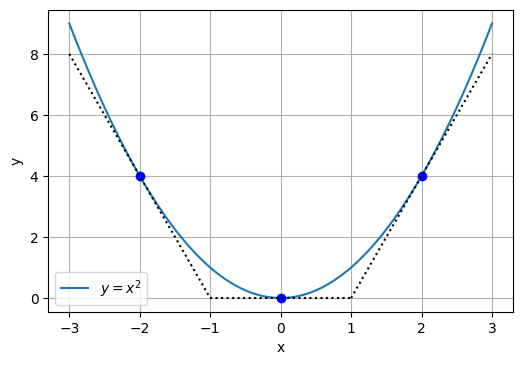

In [ ]:
x_plot = np.linspace(-3, 3, 100)
plt.plot(x_plot, x_plot**2);
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['$y=x^2$']);

for x, y in [raaklijn(x, 1, lambda x: x**2, lambda x: 2*x) for x in [-2, 0, 2]]:
    plt.plot(x[1], y[1], 'bo', x, y, 'k:');

**GRADIENT DESCENT**

De afgeleide in het punt $x=-2$ is $-4$, in het punt $x=0$ is dat $0$, en in het punt $x=2$ is dat $4$. De afgeleide is dus een maat voor de helling van de functie $f(x)$ in een punt $x$! In het linker punt is de afgeleide negatief omdat de curve daalt, in het rechter punt is de afgeleide positief omdat de curve stijgt, en in het middelste punt is de afgeleide nul omdat de curve daar daalt noch stijgt. De curve bereikt in dat punt haar minimum! En dat is een interessante vaststelling: de afgeleide geeft weer waar het minimum zich bevindt, en wanneer de afgeleide nul is, dan hebben we het minimum bereikt!

En dat is de idee achter **gradient descent**: zet een stap in de richting die de afgeleide aangeeft om uiteindelijk na vele stappen het minimum te bereiken. Maar hoe groot moeten die stappen zijn? Wel, we zien dat de afgeleide ook aangeeft hoe sterk de curve stijgt of daalt, dus nemen we stappen die evenredig zijn met de grootte van de afgeleide. Dat is waar de **learning rate** op het toneel verschijnt: die bepaalt welke fractie van de afgeleide we nemen als grootte van de stappen:

> $x_{i+1} = x_i - \alpha . f'(x_i)$

met $\alpha$ de learning rate en $i$ het iteratienummer.

Laten we dat eens implementeren voor functie $f=x^2$, waarbij we starten in $x=-3$, en kleine stapjes nemen adhv de afgeleide en een learning rate $\alpha = 0.05$, om uiteindelijk in het minimum $x=0$ uit te komen:

aantal iteraties: 214
minimum gevonden in x = -4.841927415661177e-10


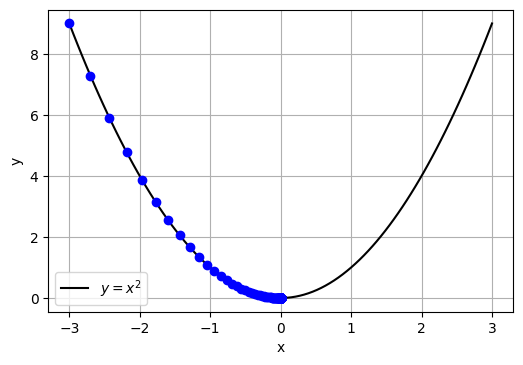

In [ ]:
alpha = 0.05  # learning rate
f = lambda x: x**2  # functie
df = lambda x: 2 * x  # afgeleide
x0 = -3  # startwaarde
x = [x0]  # alle x-waarden bijhouden in een list
while np.abs(df(x0)) > 1e-9:
    x0 -= alpha * df(x0)
    x.append(x0)
print('aantal iteraties:', len(x) - 1)
print('minimum gevonden in x =', x[-1])

# plot
x, x_plot = np.array(x), np.linspace(-3, 3, 100)
plt.plot(x_plot, f(x_plot), 'k-', x, f(x), 'bo');
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['$y=x^2$']);

Dat is dus gradient descent in zijn meest eenvoudige vorm! Het algoritme vindt natuurlijk niet exact $x = 0$ als minimum, maar het zit er wel zeer dichtbij!

**OPDRACHT**

Probeer het nu zelf eens uit voor startwaarde $x=2$, en neem deze keer een learning rate van 0.1.

aantal iteraties: 100
minimum gevonden in x = 4.0740719526689754e-10


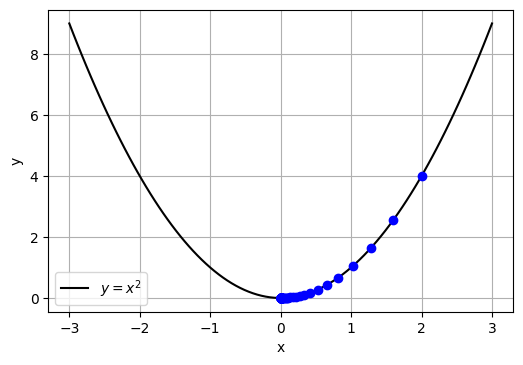

In [ ]:
# gradient descent
alpha = 0.1
x0 = 2  # startwaarde
x = [x0]  # alle x-waarden bijhouden in een list
while np.abs(df(x0)) > 1e-9:
    x0 -= alpha * df(x0)
    x.append(x0)
print('aantal iteraties:', len(x) - 1)
print('minimum gevonden in x =', x[-1])

# plot
x, x_plot = np.array(x), np.linspace(-3, 3, 100)
plt.plot(x_plot, f(x_plot), 'k-', x, f(x), 'bo');
plt.grid();
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['$y=x^2$']);

Wat gebeurt er als we geen learning rate gebruiken?

**OPDRACHT**

Neem nu de volgende functie:

> $y = sin(x^2)$

met afgeleide:

> $\frac{dy}{dx} = 2x.cos(x^2)$

Plot de functie over het interval $[-1, 3]$.

Pas daarna "gradient descent" toe om het mimimum te vinden in dit interval. Start vanaf de punten $x_0=-0.5$, $x_0=1$, $x_0=1.5$, en $x_0=2.5$. Teken een grafiek van de bekomen resultaten. Wat stel je vast?

Schrijf efficiënt code door het "gradient descent" algoritme in een functie te stoppen en door gebruik te maken van lussen.

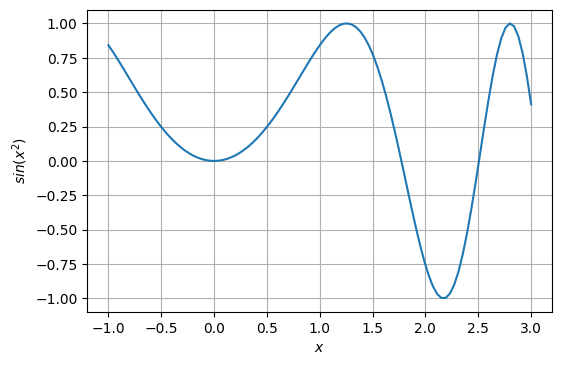

In [ ]:
f = lambda x: np.sin(x**2)  # functie
df = lambda x: 2 * x * np.cos(x**2)  # afgeleide

x = np.linspace(-1, 3, 100)
plt.plot(x, f(x));
plt.xlabel('$x$');
plt.ylabel('$sin(x^2)$');
plt.grid();

In [ ]:
def gradient_descent(f, df, x0, alpha=0.1, delta=1e-9, maxiter=1000):
    '''
    f is een functie
    df is de afgeleide van f
    x0 is de startwaarde
    alpha is de learning rate (default 0.1)
    delta is het stopcriterium (default 1e-9)
    maxiter is het maximum aantal iteraties (default 1000)
    '''
    x = [x0]  # alle x-waarden bijhouden in een list
    i = 1
    while np.abs(df(x0)) > delta and i <= maxiter:
        x0 -= alpha * df(x0)
        x.append(x0)
        i += 1
    print('aantal iteraties:', i)
    print('minimum gevonden in x =', x[-1])
    return x

In [ ]:
# optimalisatie voor 4 verschillende startwaarden
x = []
for x0 in [-0.5, 1, 1.5, 2.5]:
    print('x0 = ', x0)
    x.append(gradient_descent(f, df, x0=x0))

x0 =  -0.5
aantal iteraties: 94
minimum gevonden in x = -4.921961559437695e-10
x0 =  1
aantal iteraties: 99
minimum gevonden in x = 4.1223041623108915e-10
x0 =  1.5
aantal iteraties: 177
minimum gevonden in x = 2.1708037636272763
x0 =  2.5
aantal iteraties: 176
minimum gevonden in x = 2.1708037636268505


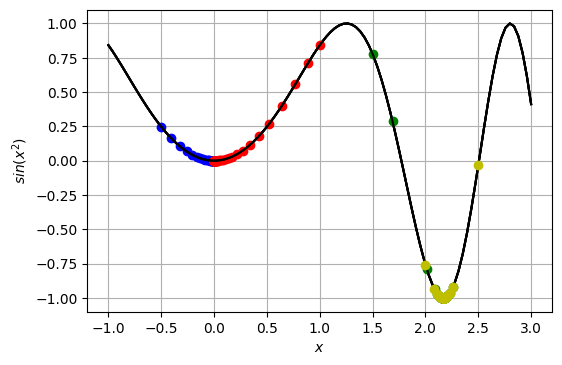

In [ ]:
# plot
x_plot = np.linspace(-1, 3, 100)
colors = ['b', 'r', 'g', 'y']
for xx, col in zip(x, colors):
    xx = np.array(xx)
    plt.plot(x_plot, f(x_plot), 'k-', xx, f(xx), col + 'o');
plt.xlabel('$x$');
plt.ylabel('$sin(x^2)$');
plt.grid();

# Conclusie: afhankelijk van de startwaarde komen we in het minimum x = 0 of x = 2.17 terecht.
# Het globale minimum is x = 2.17, terwijl x = 0 een lokaal minimum is. Zie verder!

### 2.4.2. Derivative of a tensor operation: the gradient

In de vorige paragraaf werkten we met een functie $f$ die scalar $x$ omzet naar een andere scalar $y$, wat we mooi konden voorstellen in een 2D assenstelsel. We kunnen natuurlijk ook een functie $g$ hebben die een tuple van scalars $(x_1, x_2)$ omzet naar een scalar $y$. Dat kunnen we voorstellen in een 3D assenstelsel.

Hieronder zie je een contourplot van de volgende functie

> $y = g(x_1,x_2) = x_1^2+x_2^2$

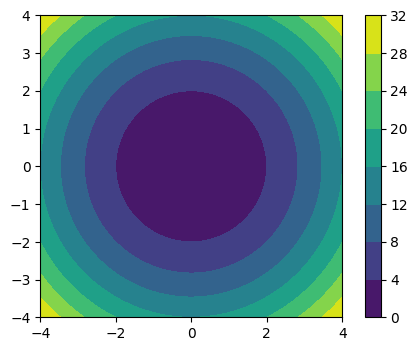

In [ ]:
g = lambda x1, x2: x1**2 + x2**2
x1, x2 = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
x1g, x2g = np.meshgrid(x1, x2)
y = g(x1g, x2g)
plt.contourf(x1g, x2g, y);
plt.colorbar();
plt.gca().set_aspect('equal');

In dit geval kunnen we de functie $g$ afleiden naar $x_1$ en naar $x_2$:

> $\frac{\delta y}{\delta x_1} = 2 x_1$

> $\frac{\delta y}{\delta x_2} = 2 x_2$

Dit noemen we **partiële afgeleiden** omdat we naar 1 variable afleiden terwijl we de andere constant beschouwen. Daarom ook dat het symbool $\delta$ wordt gebruikt ipv de gewone letter $d$. Een partieel afgeleide geeft weer hoe het 2D oppervlak stijgt of daalt in de richting van één van de variabelen.

Als we bijvoorbeeld een doorsnede door het oppervlak van de functie $g$ nemen ter hoogte van $x_2 = 0$, dan krijgen we de functie $f$ uit het vorige punt en dan is de partieel afgeleide $\frac{\delta y}{\delta x_1}$ inderdaad gelijk aan de afgeleide $f'(x_1)$.

De **gradiënt** is nu de tensor die deze partieel afgeleiden bevat. In dit voorbeeld is het een vector die de twee partieel afgeleiden bevat:

> $\text{grad } g = \nabla g = [\frac{\delta y}{\delta x_1}, \frac{\delta y}{\delta x_2}]$

Net zoals de afgeleide de richtingscoëfficiënt is van de raaklijn in een gegeven punt, beschrijft de gradiënt de helling van het raakvlak in een gegeven punt $(x_1, x_2)$.

Het **gradient descent** algoritme kunnen we nu op dezelfde manier schrijven als in de vorige paragraaf, maar we moeten wel de afgeleide vervangen door de gradiënt:

> $[x_1, x_2]_{i+1} = [x_1, x_2]_i - \alpha . \nabla g$

met $\alpha$ de learning rate en $i$ het iteratienummer.

We zien dat we nu een vergelijking krijgen met vectoren ipv scalaire waarden. Laten we dat eens implementeren voor onze functie $g$.

aantal iteraties: 112
minimum gevonden in x = [-4.19952139e-11  4.19952139e-11]


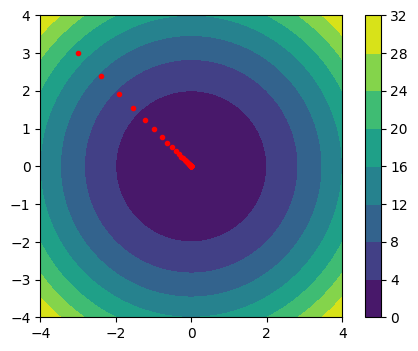

In [ ]:
# gradient descent
alpha = 0.1  # learning rate
dg = lambda x: 2 * x  # gradiënt - X is een array!
x0 = np.array([-3, 3], dtype=float)  # startpunt is [-3, 3]
x = [x0]  # alle vectoren x bijhouden in een list
while np.max(np.abs(dg(x0))) > 1e-10:
    x0 = x0 - alpha * dg(x0)
    x.append(x0)
print('aantal iteraties:', len(x) - 1)
print('minimum gevonden in x =', x[-1])

# plot
plt.contourf(x1g, x2g, y);
plt.colorbar();
plt.gca().set_aspect('equal');
x = np.array(x)
plt.plot(x[:, 0], x[:, 1], 'r.');

**OPDRACHT**

Zoek zelf uit of het algoritme nog steeds werkt als we in een ander punt starten en wanneer we de waarde voor learning rate $\alpha$ wijzigen.

aantal iteraties: 48
minimum gevonden in x = [ 4.49045154e-11 -2.24522577e-11]


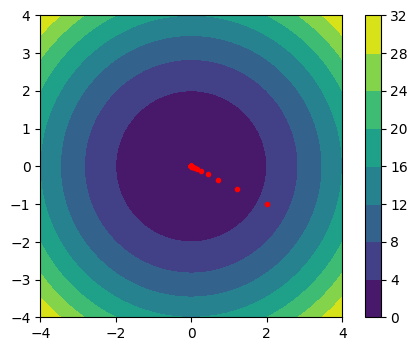

In [ ]:
# gradient descent
alpha = 0.2  # learning rate
dg = lambda x: 2 * x  # gradiënt - X is een array!
x0 = np.array([2, -1], dtype=float)  # startpunt is [2, -1]
x = [x0]  # alle vectoren x bijhouden in een list
while np.max(np.abs(dg(x0))) > 1e-10:
    x0 = x0 - alpha * dg(x0)
    x.append(x0)
print('aantal iteraties:', len(x) - 1)
print('minimum gevonden in x =', x[-1])

# plot
plt.contourf(x1g, x2g, y);
plt.colorbar();
plt.gca().set_aspect('equal');
x = np.array(x)
plt.plot(x[:, 0], x[:, 1], 'r.');

**OPDRACHT**

Neem de volgende functie:

> $y = -cos(x_1^2) + sin(x_2^2)$

met gradiënt:

> $\nabla y = [2x_1.sin(x_1^2), 2x_2.cos(x_2^2)]$

Maak een contourplot van deze functie voor $-3 \le x_1 \le 3$ en $-3 \le x_2 \le 3$. Pas dan "gradient descent" toe om het mimimum van deze functie te vinden. Test uit voor verschillende startpunten en learning rates. Neem bijvoorbeeld $(1, 1)$ en $(2, 2)$ als startpunten. Wat zie je?

Codeer opnieuw efficiënt door gebruik te maken van een functie en van lussen.



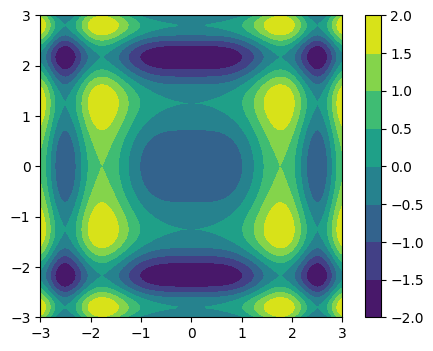

In [ ]:
g = lambda x1, x2: -np.cos(x1**2) + np.sin(x2**2)
dg = lambda x: 2 * x * np.array([np.sin(x[0]**2), np.cos(x[1]**2)])  # gradiënt - X is een array!

x1, x2 = np.linspace(-3, 3, 200), np.linspace(-3, 3, 200)
x1g, x2g = np.meshgrid(x1, x2)
y = g(x1g, x2g)
plt.contourf(x1g, x2g, y);
plt.colorbar();
plt.gca().set_aspect('equal');

In [ ]:
def gradient_descent(f, df, x0, alpha=0.01, delta=1e-5, maxiter=10000):
    x = [x0]  # alle vectoren x bijhouden in een list
    while np.max(np.abs(dg(x0))) > 1e-5 and len(x) <= maxiter:
        x0 = x0 - alpha * dg(x0)
        x.append(x0)
    print('aantal iteraties:', len(x) - 1)
    print('minimum gevonden in x =', x[-1])
    return x

In [ ]:
x_opt = []
for x0 in np.array([[1, 1], [2, 2]]):
    x_opt.append(gradient_descent(f, df, x0, alpha=0.01, maxiter=10_000))

aantal iteraties: 10000
minimum gevonden in x = [4.99373947e-02 2.15903890e-88]
aantal iteraties: 62
minimum gevonden in x = [2.50662823 2.17080326]


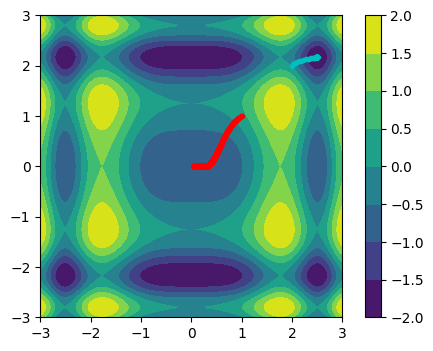

In [ ]:
# plot
plt.contourf(x1g, x2g, y);
plt.colorbar();
plt.gca().set_aspect('equal');

colors = ['r', 'c']
for x, col in zip(x_opt, colors):
    x = np.array(x)
    plt.plot(x[:, 0], x[:, 1], col + '.');

# Conclusie: afhankelijk van de startwaarde komen we in een ander minimum terecht.

**VERALGEMENING NAAR N DIMENSIES**

Door gebruik te maken van tensoren kunnen we het gradient descent algoritme eenvoudig veralgemenen naar N dimensies, zoals we ook al in ons codevoorbeeld hebben gedaan:

> $x_{i+1} = x_i - \alpha . \nabla g(x)$

met $\alpha$ de learning rate, $i$ het iteratienummer, en $x$ een vector met $N$ elementen.

Maar hoe kunnen we nu gradient descent toepassen bij het vinden van de optimale gewichten in een **neuraal netwerk**?

De functie waarvan we het minimum zoeken bij een neuraal netwerk is de **lossfunctie** die de fout tussen voorspellingen en gegeven labels uitdrukt. De variabelen zijn niet de features $x$, maar de **parameters** die moeten geoptimaliseerd worden. M.a.w. het zijn de gewichten en de bias!

Concreet hebben we volgende variabelen:
- trainingdata: vector `x` met features
- bijhorende labels: vector `y_true`
- parameters: matrix `W` met gewichten en vector `b` met bias
- voorspellingen: vector `y_pred`
- loss: functie `loss`

Voorspellingen en loss worden als volgt berekend:

> `y_pred = dot(W, x) + b`

> `loss_value = loss(y_pred, y_true)`

Dus eigenlijk is de loss een functie van te optimaliseren parameters:

> `loss_value = f(W, b)`

Zoals we hebben gezien is dit een meerdimensionaal oppervlak in een meerdimensionale ruimte waarvan we de gradiënt kunnen bepalen:

> `grad(loss_value, W)` en `grad(loss_value, b)`

We hebben ook al gezien dat we starten met random initiële waarden voor de parameters: `W0` en `b0`. Het updaten van die initiële gewichten gebeurt ook met gradiënt descent:

> `W1 = W0 - alpha * grad(loss_value, W0)`

> `b1 = b0 - alpha * grad(loss_value, b0)`

waarbij `alpha` de learning rate is.

En zo kunnen we verder gaan tot we het de optimale waarden voor `W` en `b` hebben gevonden, net zoals we dat met ons eenvoudig voorbeeld hebben gedemonstreerd. Alleen is de lossfunctie veel complexer waardoor er een paar bijkomende moeilijkheden zijn...

### 2.4.3. Stochastic Gradient Descent

We hebben gezien dat bij een functie met 1 variabele het minimum overeenkomt met het punt waarin de afgeleide nul is. Ook dit kunnen we veralgemenen naar N dimensies: het minimum is het punt waar alle partieel afgeleiden nul zijn, of dus waar de gradiënt gelijk is aan de nulvector.

Een neuraal netwerk zoekt naar het minimum van de lossfunctie omdat in dat punt de (gemiddelde) fout tussen labels en voorspellingen minimaal is. De optimale parameters komen dus overeen met het minimum van de lossfunctie. In dat punt is de gradient van de lossfunctie nul:

> `grad(loss_value, W) = 0` en `grad(loss_value, b) = 0`

Theoretisch is dat een vergelijking die analytisch kan worden opgelost. Maar zoals we al aangaven is de lossfunctie geen eenvoudige functie. Bovendien zijn er duizenden of zelfs miljoenen onbekende parameters in een neuraal netwerk, waardoor dit wiskundig probleem enkel numeriek en iteratief kan opgelost worden. Dit doen we met het **Stochastic Gradient Descent** algoritme, of een variant op dat algoritme. Zoals we in onze eenvoudige voorbeelden hebben gezien geeft dit slechts een benaderende oplossing, m.a.w. een oplossing die (hopelijk) dicht bij het exacte minimum ligt.

Het Stochastic Gradient Descent (SGD) algoritme werkt als volgt:

1. Neem een batch van training samples `x` en bijhorende labels of targets `y_true`
2. Bereken de voorspellingen `y_pred`. Dit is de **forward pass**.
3. Bereken de loss
4. Bereken de gradiënt van de loss, m.a.w. de partiële afgeleiden van de loss naar de parameters. Dit is de **backward pass**.
5. Beweeg de parameters in de tegengestelde richting van de gradiënt: `W -= alpha * gradient`.

Dit algoritme noemen we **mini-batch SGD**, omdat we met batches werken. De term "stochastisch" is een synoniem van "random" en verwijst naar het feit dat we die batches willekeurig selecteren.

Onderstaande figuur toont het principe voor een probleem met slechts 1 parameter, bijv. een enkelvoudige lineaire regressie waarbij we de data fitten mbv een rechte door de oorsprong (dus enkel een rico, geen intercept). Dit is zoals we hebben gedemonstreerd met de cosinusfunctie in een vorige paragraaf. De $t$ op de figuur is het iteratienummer.

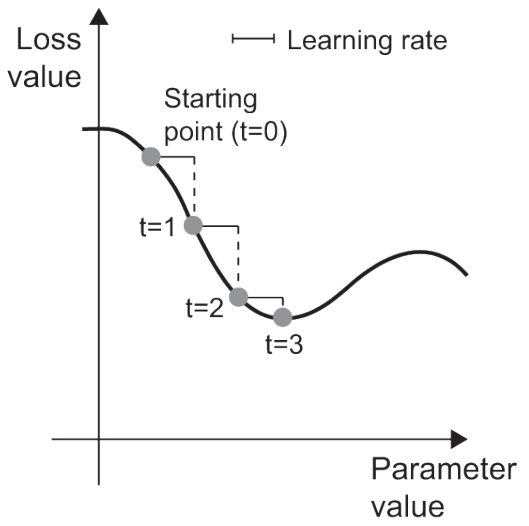

We weten ondertussen ook al dat een te kleine learning rate het optimalisatieproces te traag laat verlopen omdat de stappen te klein zijn, terwijl een te grote learning rate ervoor zorgt dat het minimum niet wordt gevonden omdat we "er over stappen".

In plaats van met batches te werken, kunnen we ook 1 sample met een keer nemen en dat is dan het *échte SGD* algoritme, dat echter niet zo efficiënt is. Wanneer we de volledige trainingset samen nemen, dan noemen we dat **(full) Batch SGD**. Meestal is het echter niet mogelijk om de volledige dataset in het geheugen te laden, en dus is het compromis om met mini-batches te werken.

We weten ondertussen ook al dat de lossfunctie in realiteit een meerdimensionaal oppervlak is dat we kunnen vergelijken met een berglandschap. De figuur hieronder stelt dat voor in 3 dimensies, wat dus een lossfunctie is voor een probleem met 2 parameters, bijv. een perceptron of logistic regression model. Maar let wel op dat intuïties op basis van twee- of driedimensionale analogieën niet altijd correcte weergaves zijn van wat er zich in meerdimensionale ruimtes afspeelt!

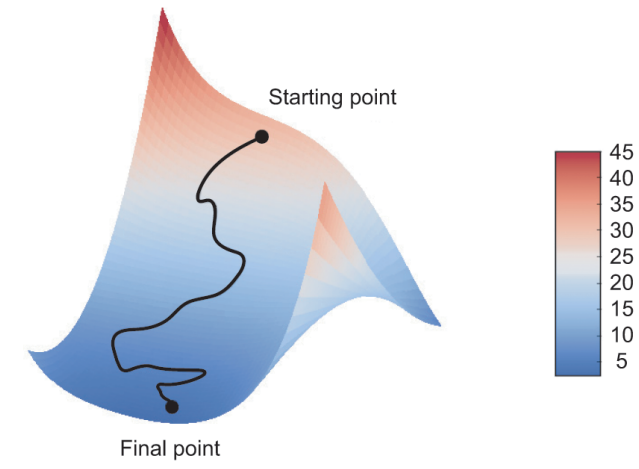

De analogie met het berglandschap klopt wel als het gaat over lokale minima en het globaal minimum. Er zijn inderdaad meerdere punten waar de gradiënt nul is, en dat noemen we **lokale minima**. Uiteraard zoeken we het échte minimum, het punt waar de lossfunctie écht minimaal is, en dat noemen we het **globale minimum**. Het is duidelijk dat we met het SGD algoritme vast kunnen zitten in een lokaal minimum, zeker als de learning rate klein is. Daarom werden varianten bedacht op SGD, zoals *RMSProp* en *Adagrad*, en die maken gebruik van het concept **momentum**, dat er bovendien voor zorgt dat die algoritmes sneller convergeren de klassieke SGD. Die verschillende optimalisatiealgoritmes noemen we kortweg **optimizers**.

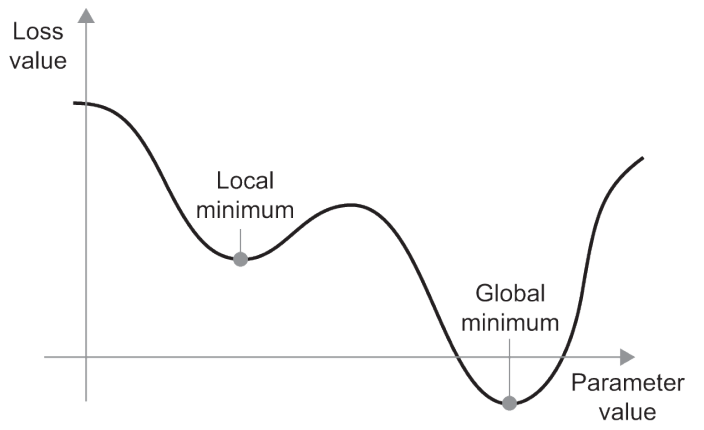

Het begrip "momentum" komt uit de fysica (in het Nederlands noemen we dit "impuls"). Het zoeken van het minimum van de lossfunctie kunnen we vergelijken met een bal die op een oneffen oppervlak rolt waarbij we natuurlijk willen dat de bal terechtkomt in de diepste put. De gradiënt komt hier overeen met de versnelling van de bal, terwijl het momentum ook rekening houdt met de snelheid. We moeten er immers voor zorgen dat de snelheid voldoende hoog blijft zodat de bal niet komt vast te zitten in een andere 'lokale' put. Daarom gaan we de parameters niet alleen updaten obv de gradiënt, maar brengen we ook de snelheid in rekening.

Hieronder is een (naïef) pseudo-algoritme dat het gebruik van "momentum" illustreert:

```python
past_velocity = 0.0
momentum = 0.1  # constante momentum factor
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```

### 2.4.4. Chaining derivatives: the backpropagation algorithm

We zijn er tot nu toe van uit gegaan dat de gradiënt eenvoudig kan berekend worden, maar is dat wel zo? Een meerlagig neuraal netwerk past achtereenvolgens tensoroperaties en -functies toe waardoor het berekenen van de gradiënt van de lossfunctie toch niet zo vanzelfsprekend is. Gelukkig kunnen we hier beroep doen op het **backpropagation** algoritme! En dat algoritme maakt gebruik van de **kettingregel** (Engels: chain rule).

#### The chain rule

Eerst en vooral moeten we uitleggen wat een **samengestelde functie** is. Zoals de naam het zegt is dat een functie die is samengesteld uit andere functies die achtereenvolgens worden uitgevoerd.

Een voorbeeld om dat te verduidelijken. Nemen we de 2 functies die we in een vorig punt als voorbeeld hebben genomen: de cosinusfunctie en de kwadraatfunctie. Definiëren we nu de volgende functie:

> $z = h(x) = cos(x^2)$

dan zien we dat die functie eigenlijk is samengesteld adhv die twee eenvoudiger functies:

> $ y = g(x) = x^2 $

> $ z = f(y) = cos(y) $

We schrijven de samengestelde functie als volgt:

> $ z = h(x) = f(g(x)) = (f \circ g)(x) $

Het $\circ$ symbool geeft aan dat functie $f$ na functie $g$ wordt uitgevoerd, en je mag dat dus ook zo lezen: "$f$ na $g$".

Laten we dat eens uittesten met code:

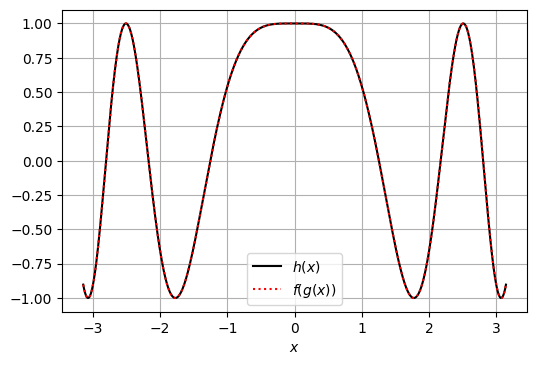

In [ ]:
g = lambda x: x**2
f = lambda y: np.cos(y)
h = lambda x: np.cos(x**2)
fg = lambda x: f(g(x))

x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, h(x), 'k-', x, fg(x), 'r:');
plt.grid();
plt.xlabel('$x$');
plt.legend(['$h(x)$', '$f(g(x))$']);

We zien inderdaad op de grafiek dat beide functies hetzelfde resultaat geven.



De **kettingregel** zegt nu dat de afgeleide van een samengestelde functie gelijk is aan het product van de afgeleiden van de samenstellende functies:

> $h'(x) = f'(y) . g'(x) = f'(g(x)) . g'(x)$

In ons voorbeeld zou dat betekenen dat:

> $h'(x) = -sin(x^2) . (2x)$

omdat de afgeleide van $cos(y)$ gelijk is aan $-sin(y)$ en de afgeleide van $x^2$ gelijk is aan $2x$.

Laten we dat ook eens uittesten met code:

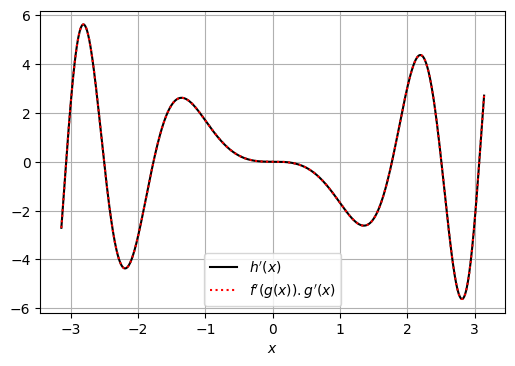

In [ ]:
dg = lambda x: 2 * x
df = lambda y: -np.sin(y)
dh = lambda x: -np.sin(x**2) * 2 * x
dfg = lambda x: df(g(x)) * dg(x)

x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, dh(x), 'k-', x, dfg(x), 'r:');
plt.grid();
plt.xlabel('$x$');
plt.legend(["$h'(x)$", "$f'(g(x)).g'(x)$"]);

Uiteraard kunnen we de kettingregel gaan veralgemenen naar meer dan 2 functies en naar gradiënten. Stel dat we 4 functies $f$, $g$, $h$ en $j$ hebben die na elkaar worden uitgevoerd:

```python
def fghj(x):
    x1 = j(x)
    x2 = h(x1)
    x3 = g(x2)
    y = f(x3)
    return y
```
Dan is de gradiënt van die samengestelde functie gelijk aan:

```python
grad(y, x) == grad(y, x3) * grad(x3, x2) * grad(x2, x1) * grad(x1, x)
```

Die algemene kettingregel hebben we nodig bij het updaten van de parameters in een meerlagig neuraal netwerk. Nemen we als voorbeeld het eenvoudig tweelagig neuraal netwerk dat we aan het begin van dit hoofdstuk hebben getraind, dan is de lossfunctie van dat model gelijk aan de volgende samengestelde functie:

```python
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```

met `W1` en `b1` de parameters van de eerste laag en `W2` en `b2` de parameters van de tweede laag. Om de gradiënt van deze samengestelde functie te berekenen, passen we het backpropagation algoritme toe.

**OPDRACHT**

Neem de volgende samengestelde functie:

> $z = \ln(x^3)$

Als je weet dat de afgeleide van $\ln(y)$ gelijk is aan $1/y$, en de afgeleide van $x^3$ gelijk is aan $3 x^2$, bereken dan de afgeleide $\frac{dz}{dx}$ van functie $z$.

Plot functie $z$ in een grafiek en plaats daaronder een tweede grafiek die de afgeleide $\frac{dz}{dx}$ weergeeft.

Tip: maak gebruik van functies `logspace`, `semilogx` en/of `loglog`.


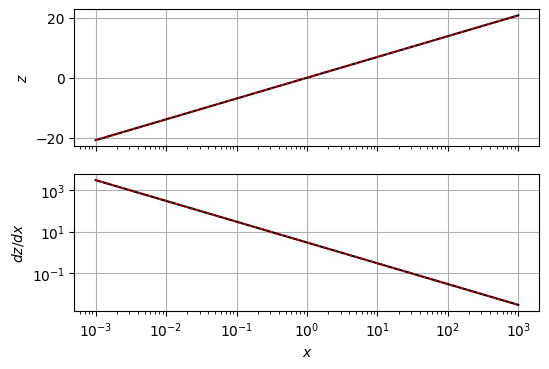

In [ ]:
z = lambda x: np.log(x**3)
y = lambda x: x**3
z2 = lambda y: np.log(y)

dz = lambda x: 3 / x
dy = lambda x: 3 * x**2
dz2 = lambda y: 1 / y

_, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x = np.logspace(-3, 3, 100)
ax1.semilogx(x, z(x), 'k-', x, z2(y(x)), 'r:');
ax1.grid();
ax1.set_ylabel('$z$');
ax2.loglog(x, dz(x), 'k-', x, dz2(y(x)) * dy(x), 'r:');
ax2.grid();
ax2.set_xlabel('$x$')
ax2.set_ylabel('$dz/dx$');

#### Automatic differentation with computation graphs

TensorFlow maakt gebruik van **computation graphs** voor het toepassen van het backpropagation algoritme. Een computation graph is een acyclische grafe zoals we dat hebben gezien in het vak "Intro to AI". Het is dus een datastructuur die ons toelaat om berekeningen als data te behandelen waardoor die ook als input of output kunnen gebruikt worden van andere programma's.

Als voorbeeld zie je hieronder de computation graph van het eenvoudig tweelagig neuraal netwerk dat we in het begin van dit hoofdstuk hebben opgesteld:

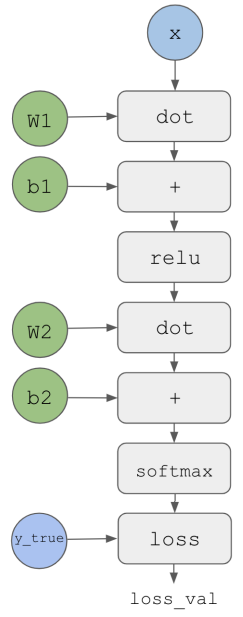

Om nu het nut van die computation graphs aan te tonen bij het toepassen van de kettingregel, nemen we een heel eenvoudig neuraal netwerk:

- inputdata `x = 2`
- label `y_true = 4`
- gewicht `w = 3`
- bias `b = 1`
- predictie `y_pred = w * x + b = 7`
- loss `loss_val = abs(y_pred - y_true) = 3`

In de figuur hieronder zien we links de computation graph die uiteindelijk `loss_val` als output heeft.


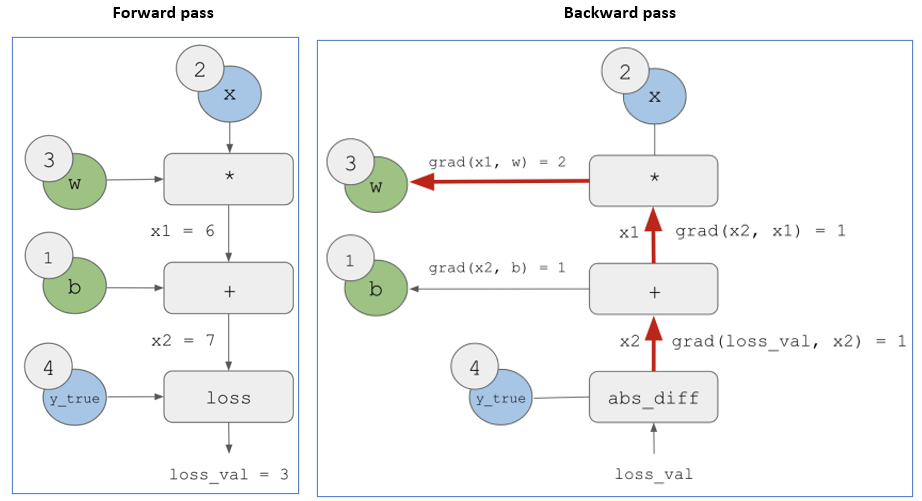

Rechts op de figuur zien we dan de "backward pass" die de partieel afgeleiden berekent van de lossfunctie naar gewicht `w` en bias `b`.

1. De afgeleide van de `loss_val` naar `x2` is 1 want als `x2` met `epsilon` toeneemt dan wordt `loss_val` eveneens met `epsilon` verhoogd.
2. De afgeleide van `x2` naar `b` is 1 want als `b` met `epsilon` toeneemt dan wordt `x2` eveneens met `epsilon` verhoogd.
3. De afgeleide van `x2` naar `x1` is 1 want als `x1` met `epsilon` toeneemt dan wordt `x2` eveneens met `epsilon` verhoogd.
4. De afgeleide van `x1` naar `w` is 2 want als `w` met `epsilon` toeneemt dan wordt `x1` met `2 * epsilon` verhoogd.

Wanneer we nu de afgeleide willen berekenen van `loss_vall` naar `w`, dan moeten we gewoon de pijltjes in de computation graph volgen en alle afgeleiden die we tegenkomen met elkaar vermenigvuldigen:

`grad(loss_val, w) = grad(loss_val, x2) * grad(x2, x1) * grad(x1, w) = 1 * 1 * 2 = 2`



Laten we dat eens implementeren:

In [ ]:
# gegeven
x = 2
y_true = 4
w = 3
b = 1

In [ ]:
# forward pass
x1 = lambda w, x: w * x
x2 = lambda x1, b: x1 + b
loss = lambda x2, y_true: np.abs(x2 - y_true)

print('x1 =', x1(w, x))
print('x2 =', x2(x1(w, x), b))
print('loss =', loss(x2(x1(w, x), b), y_true))

x1 = 6
x2 = 7
loss = 3


In [ ]:
# backward pass
def grad(f, x, i_par):
    # berekent afgeleide van functie f(x) naar x[i_par]
    # waarbij x een is vector met twee elementen
    x = np.array(x, dtype=float)
    x_epsilon = x.copy()
    epsilon = 0.1
    x_epsilon[i_par] += epsilon
    g = (f(x_epsilon[0], x_epsilon[1]) - f(x[0], x[1])) / epsilon
    return g

print('grad(loss_val, x2) =', grad(loss, [y_true, x2(x1(w, x), b)], 1))
print('grad(x2, b) =', grad(x2, [x1(w, x), b], 1))
print('grad(x2, x1) =', grad(x2, [x1(w, x), b], 0))
print('grad(x1, w) =', grad(x1, [w, x], 0))
print()
print('grad(loss_val, b) =', grad(loss, [y_true, x2(x1(w, x), b)], 1) * grad(x2, [x1(w, x), b], 1))
print('grad(loss_val, w) =',
      grad(loss, [y_true, x2(x1(w, x), b)], 1) * grad(x2, [x1(w, x), b], 0) * grad(x1, [w, x], 0))

grad(loss_val, x2) = 0.9999999999999964
grad(x2, b) = 0.9999999999999964
grad(x2, x1) = 0.9999999999999964
grad(x1, w) = 2.0000000000000018

grad(loss_val, b) = 0.9999999999999929
grad(loss_val, w) = 1.9999999999999876


Die twee laatste afgeleiden van de lossfunctie naar de 2 parameters, hebben we nodig om die 2 parameters aan te passen m.b.v. de learning rate, zoals we in de vorige paragrafen hebben gezien.

Je merkt dat het toch al behoorlijk ingewikkeld wordt voor dit toch wel zeer eenvoudige netwerk. Maar gelukkig bestaan er nu frameworks zoals TensorFlow die deze gradiënten automatisch kunnen berekenen waardoor het in feite niet meer nodig is om backpropagation zelf te implementeren.

#### The gradient tape in TensorFlow

TensorFlow berekent dus automatisch de gradiënten, wat we **automatische differentiatie** noemen. De API waarmee we dit doen is de `GradientTape`, een Python scope dat de tensoroperaties die erin uitgevoerd worden 'opneemt' in de vorm van een computation graph, ook wel "tape" genaamd. Die tape kan dan worden gebruikt om de gradiënt te berekenen naar om het even welke variabele.

Een klein voorbeeldje om dit te illustreren:

In [ ]:
import tensorflow as tf

x = tf.Variable(0.)  # TensorFlow variabele

with tf.GradientTape() as tape:
    y = 2 * x + 3

dydx = tape.gradient(y, x)  # afgeleide van y naar x
dydx

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

We zien dat we een `tf.Variable` definiëren, een soort tensor die 'mutable' of veranderlijk is. De gewichten in een neuraal network worden bijvoorbeeld opgeslagen mbv dit datatype. De output van `tape.gradient` is een `tf.Tensor`, die kan omgezet worden naar een NumPy array met de methode `numpy()`:

In [ ]:
dydx.numpy()

2.0

Uiteraard werkt `GradientTape` ook met een lijst van variabelen:

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))  # random gewichten
b = tf.Variable(tf.zeros((2,)))  # bias
x = tf.random.uniform((2, 2))  # input

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b  # matmul = dot product

g = tape.gradient(y, [W, b])  # gradiënt voor W én b
g  # list met 2 tf.Tensor objecten in

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3203117 , 1.3203117 ],
        [0.71801805, 0.71801805]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [ ]:
print(g[0].numpy())  # gradiënt voor W
print()
print(g[1].numpy())  # gradiënt voor b

[[1.3203117  1.3203117 ]
 [0.71801805 0.71801805]]

[2. 2.]


**OPDRACHT**

Bereken de afgeleide van de functie $z = \ln(x^3)$ mbv `GradientTape` en plot het resultaat.

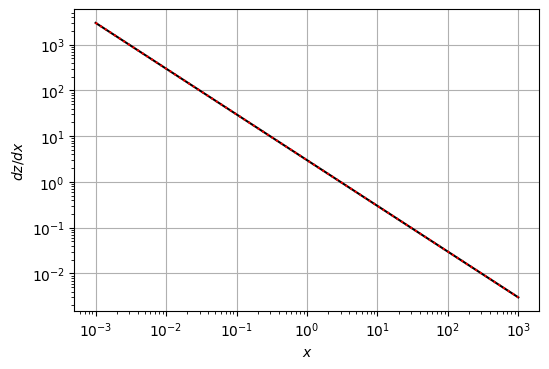

In [ ]:
x = tf.Variable(np.logspace(-3.0, 3.0, 100))
with tf.GradientTape() as tape:
    z = tf.math.log(x**3.0)

dzdx = tape.gradient(z, x)  # afgeleide van z naar x

x, dzdx = x.numpy(), dzdx.numpy()

plt.loglog(x, dzdx, 'k-', x, 3 / x, 'r:');
plt.grid();
plt.xlabel('$x$');
plt.ylabel('$dz/dx$');


## 2.5. Looking back at our first example

Nu we alle onderdelen van een neuraal netwerk onder de loep hebben genomen, begrijp je ook beter de figuur hieronder die we in het eerste hoofdstuk hebben besproken:

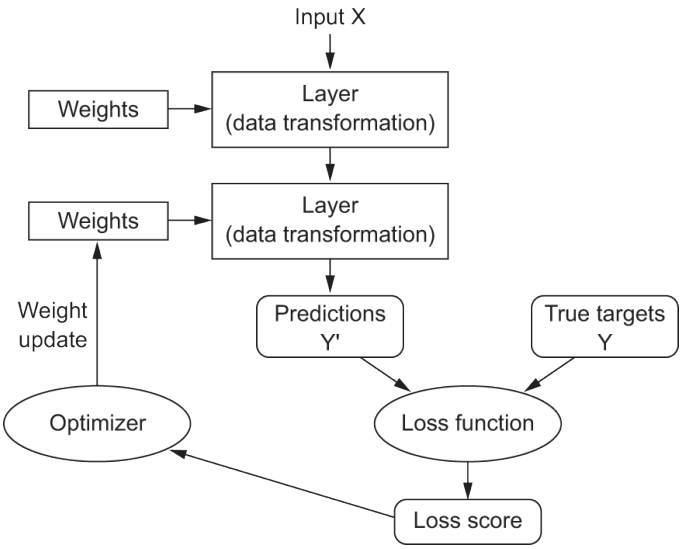

Laten we die figuur nog eens overlopen adhv het neurale netwerk dat we aan het begin van dit hoofdstuk hebben opgesteld en getraind.

Eerst moeten we natuurlijk de nodige import statements uitvoeren:

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

De MNIST dataset gaan we opnieuw inladen en de images moeten we omzetten naar een rank-2 tensor met floats tussen 0 en 1:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We bouwen een model met twee lagen. De eerste laag heeft de ReLU als activatiefunctie, de tweede de softmax. Het zijn die lagen die dus de input gaan transformeren adhv tensoroperaties. Elke laag bevat parameters - de gewichten en de bias - die we straks gaan optimaliseren. Deze parameters vertegenwoordigen de "kennis" in het model.

In [ ]:
model = models.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Dat model moeten we vervolgens compileren. In deze stap geven we een optimizer op, in dit geval is dit RMSProp, een variant op Stochastic Gradient Descent die naast de gradiënten ook gebruik maakt van "momentum" om het minimum in de lossfunctie te vinden. Die lossfunctie is hier de "sparse categorical crossentropy". Bij logistic regression zagen we een gelijkaardige lossfunctie, maar dan voor binaire classificatie. Tenslotte geven we ook nog de nauwkeurigheid of "accuracy" op als metriek, omdat die bij classificatie makkelijker te interpreteren is dan de lossfunctie. Die metriek zal samen met de lossfunctie weergegeven worden in de trainingsecho.

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Nu zijn we klaar om het model te trainen met de trainingset. We geven dus enkel de images en de labels door van deze set. Het aantal **epochs** is hier 5, en dat is het aantal keren dat de optimizer de volledige dataset zal doorlopen om de parameters aan te passen. De batch size is 128, wat wil zeggen dat de optimizer 128 training images samen neemt in de forward en backward pass. M.a.w. de optimizer zal voor elke batch de gradiënt berekenen van de lossfuntie voor alle parameters en op basis daarvan de gewichten aanpassen door toepassing van het backpropagation algoritme.

In [ ]:
model.fit(train_images, train_labels,
          epochs=5, batch_size=128);

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2578 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1062 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0698 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0389 - accuracy: 0.9881


In totaal heeft het model 2345 keer de parameters geüpdatet; dat zijn 469 updates per epoch. Daardoor is de loss na elke epoch afgenomen en de nauwkeurigheid toegenomen tot meer dan 98% op het einde van de training.

Zoals we weten is het een goede praktijk om het model na de training te evalueren mbv de testset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9815


De loss is beduidend hoger en de nauwkeurigheid ligt ook lager dan die van de training, dus hebben we hier waarschijnlijk met overfitting te maken. Om dat te voorkomen moeten we in principe het model valideren tijdens het trainen. Dat doen we adhv een derde dataset: de validatieset. De validatie is bedoeld om de hyperparameters te finetunen en overfitting te checken. We zullen daar dieper op ingaan in de volgende hoofdstukken.

### 2.5.1. Reimplementing our first example from scratch in TensorFlow

Zelf neurale netwerken gaan ontwikkelen in TensorFlow behoort niet tot de scoop van dit vak, maar het is zeker de moeite om deze paragraaf door te nemen en de code van François Chollet grondig te analyseren.

#### A simple Dense class

Eerst importeren we TensorFlow:

In [ ]:
import tensorflow as tf

De klasse `NaiveDense` is een eenvoudige implementatie van de `Dense` klasse in Keras. Het stelt een volledig geconnecteerde laag in het neurale netwerk voor. We weten ondertussen dat een laag de inputdata als volgt transformeert:

```python
output = activation(dot(inputs, W) + b)
```
Hierin is `W` de matrix met gewichten en `b` de biasvector. De eerste wordt met random getallen geïnitialiseerd, de tweede wordt meestal initieel met nullen opgevuld. Herinner je ook dat de dot-operatie een matrixvermenigvuldiging uitvoert en dat dit in TensorFlow met de functie `matmul` wordt gedaan.

In [ ]:
class NaiveDense:

    def __init__(self, input_size, output_size, activation):

        self.activation = activation  # de activatiefunctie, bijv. relu

        w_shape = (input_size, output_size)  # de shape van W, de matrix met gewichten
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)  # W initialiseren met random getallen

        b_shape = (output_size,)  # de shape van b, de vector met de bias
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)  # b wordt met nullen geïnitialiseerd

    def __call__(self, inputs):  # de forward pass
        return self.activation(tf.matmul(inputs, self.W) + self.b)  # activation(dot(input, W) + b)

    @property
    def weights(self):
        return [self.W, self.b]  # retourneert de parameters (W én b)

#### A simple Sequential class

De klasse `NaiveSequential` is dan het eenvoudige equivalent van Keras klasse `Sequential`. Deze klasse houdt de verschillende lagen bij. Bemerk het gebruik van de `__call__` methode die toelaat om de klasse als een functie te gebruiken. Zie bijvoorbeeld volgende blog met meer uitleg en enkele eenvoudige voorbeelden: https://pencilprogrammer.com/__call__-in-python/.

In [ ]:
class NaiveSequential:

    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):  # roept de verschillende lagen aan
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):  # retourneert de parameters van alle lagen
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

#### A batch generator

Tenslotte definiëren de klasse `BatchGenerator` die de trainingset opsplitst in batches. Die batches kunnen één voor één worden doorlopen mbv de methode `next`.

In [ ]:
class BatchGenerator:

    def __init__(self, images, labels, batch_size=128):
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

Hier hebben we onze eigen generator gedefinieerd, maar Python voorziet ook zelf generators. Dit zijn een speciaal soort functies die het mogelijk maken om te itereren over objecten zoals je dat doet met een list. Meer informatie vind je hier: https://realpython.com/introduction-to-python-generators/.

### 2.5.2. Running one training step

De trainingstap waarin de gewichten worden geüpdatet is de moeilijkste stap om te implementeren. Gelukkig kunnen we hier gebruik maken van TensorFlows `GradientTape`.

We beginnen eenvoudig met één stap, die uit 4 onderdelen bestaat:

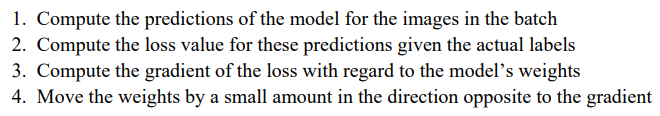

In [ ]:
def one_training_step(model, images_batch, labels_batch):

    with tf.GradientTape() as tape:  # forward pass
        predictions = model(images_batch)  # voorspellingen
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)  # loss
        average_loss = tf.reduce_mean(per_sample_losses)  # gemiddelde loss

    gradients = tape.gradient(average_loss, model.weights)  # gradiënten berekenen
    update_weights(gradients, model.weights)  # gewichten updaten (zie verder)

    return average_loss

De functie om de gewichten te updaten mbv de learning rate:

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, model.weights):
        w.assign_sub(g * learning_rate)  # w_new = w - gradient * learning_rate

Je kan ook gewoon de SGD (of een andere) optimizer van Keras gebruiken:

```python
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=learning_rate)
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))
```

### 2.5.3. The full training loop

De volledige trainingsloop bestaat uit twee lussen:
- de inwendige batch-lus doorloopt alle batches
- de uitwendige epoch-lus doorloopt alle epochs

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(len(images) // batch_size):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            #if batch_counter % 100 == 0:
            #    print(f"loss at batch {batch_counter}: {loss:.2f}")
        print(f"loss at batch {batch_counter}: {loss:.2f}")

Mbv de klassen `NaiveSequential` en `NaiveDense` kunnen we nu het eenvoudige neurale netwerk voor het classificeren van de MNIST images nabouwen:

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

Waarom moeten er 4 elementen zijn in `model.weights`?

We kunnen het model nu trainen op de MNIST dataset:

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
fit(model, train_images, train_labels, epochs=50, batch_size=128)

Epoch 0
loss at batch 467: 1.87
Epoch 1
loss at batch 467: 1.50
Epoch 2
loss at batch 467: 1.20
Epoch 3
loss at batch 467: 0.97
Epoch 4
loss at batch 467: 0.79
Epoch 5
loss at batch 467: 0.67
Epoch 6
loss at batch 467: 0.57
Epoch 7
loss at batch 467: 0.50
Epoch 8
loss at batch 467: 0.44
Epoch 9
loss at batch 467: 0.39
Epoch 10
loss at batch 467: 0.35
Epoch 11
loss at batch 467: 0.32
Epoch 12
loss at batch 467: 0.30
Epoch 13
loss at batch 467: 0.28
Epoch 14
loss at batch 467: 0.26
Epoch 15
loss at batch 467: 0.25
Epoch 16
loss at batch 467: 0.23
Epoch 17
loss at batch 467: 0.22
Epoch 18
loss at batch 467: 0.21
Epoch 19
loss at batch 467: 0.20
Epoch 20
loss at batch 467: 0.19
Epoch 21
loss at batch 467: 0.19
Epoch 22
loss at batch 467: 0.18
Epoch 23
loss at batch 467: 0.17
Epoch 24
loss at batch 467: 0.17
Epoch 25
loss at batch 467: 0.16
Epoch 26
loss at batch 467: 0.16
Epoch 27
loss at batch 467: 0.16
Epoch 28
loss at batch 467: 0.15
Epoch 29
loss at batch 467: 0.15
Epoch 30
loss at bat

Probeer om ook de nauwkeurigheid uit te printen na elke epoch. Kan je er ook voor zorgen dat het model sneller convergeert?

### 2.5.4. Evaluating the model

Tenslotte evalueren we het model adhv de testset:

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.89


Herinner je dat we de `argmax` functie gebruiken om de `predictions` (de kansen) om te zetten naar de klasse, in dit geval het cijfer dat op de image staat geschreven.